In [118]:
import csv
import locale
import time
from datetime import datetime

locale.setlocale(locale.LC_ALL, '')
timeFactor = lambda x: round(-0.2369935 + (0.981336 + 0.2369935)/(1 + pow((x/2.542431), 3.1187)), 3)

def yearsFromDate(dateString):
    if len(dateString) == 0:
        return 1
    date = datetime.strptime(dateString, "%m/%d/%Y")
    diff = datetime.utcnow() - date 
    return round(diff.days / 365, 2)

def getNumEmployees(employeesString):
    if '+' in employeesString:
        return employeesString[:employeesString.index('+')]
    return employeesString[employeesString.index('-') + 1:] if '-' in employeesString else "10000"

with open ('new_top_companies.csv', 'r') as file:
    reader = csv.DictReader(file)
    companies = [row for row in reader]
for company in companies:
    status = company['last_funding_type'] if company['status'] != 'IPO' else company['status']
    time_weight = timeFactor(yearsFromDate(company['last_funding_date'])) if status != 'IPO' else 1
    total_funding = round(locale.atof(company['total_equity_funding_amount'][1:])/1000000, 2) if len(company['total_equity_funding_amount']) > 1 else 0
    num_employees = int(getNumEmployees(company['employees_estimate']))
    score = round(total_funding * time_weight / num_employees, 3)
    company['score'] = str(score)
    
for company in companies[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

SpaceX | $1,495,560,000 | 1001-5000 | 0.292
BuzzFeed | $496,300,000 | 501-1000 | 0.441
Uber | $8,812,450,000 | 5001-10000 | 0.844
HubSpot | $100,500,000 | 501-1000 | 0.101
DJI | $105,000,000 |  | 0.003
Symantec | $503,000,000 | 10001+ | 0.05
Redfin | $167,820,000 | 501-1000 | 0.168
GrubHub | $84,100,000 | 501-1000 | 0.084
Flipkart | $7,122,140,000 | 10001+ | 0.696
Yelp | $56,000,000 | 501-1000 | 0.056
WeWork | $9,853,784,331 | 501-1000 | 9.637
Databricks | $247,000,000 | 101-250 | 0.966
ThoughtSpot | $150,700,000 | 101-250 | 0.59
Hyperloop One | $141,100,000 | 101-250 | 0.488
Groupon | $1,387,000,000 | 1001-5000 | 0.277
Impossible Foods | $257,000,000 | 101-250 | 1.003
Lyft | $2,612,500,000 | 1001-5000 | 0.499
Outbrain | $194,000,000 | 501-1000 | 0.14
TuneIn | $103,122,231 | 51-100 | 1.007
Zillow | $96,627,980 | 1001-5000 | 0.019


In [119]:
companies.sort(key=lambda x: float(x['score']), reverse=True)
for company in companies[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Ele.me | $3,335,000,000 | 11-50 | 64.632
Filecoin | $252,120,000 | 1-10 | 24.632
Wish | $1,078,700,000 | 11-50 | 18.964
Expa | $150,000,000 | 1-10 | 10.2
Jiuxian.com | $249,963,505 | 1-10 | 10.173
WeWork | $9,853,784,331 | 501-1000 | 9.637
Ionic Security | $122,440,001 | 1-10 | 9.122
Genalyte | $91,800,000 | 1-10 | 8.179
Calient Technologies | $405,118,814 | 11-50 | 6.62
ARMO BioSciences | $100,000,000 | 1-10 | 6.27
Dailyhunt | $66,643,163 | 1-10 | 5.778
Guardant Health | $550,000,000 | 51-100 | 5.296
GRAIL | $1,311,655,039 | 101-250 | 5.147
Forty Seven | $75,000,000 | 1-10 | 4.83
Mobvoi Inc. | $252,720,178 | 11-50 | 4.822
Kabbage | $488,650,000 | 51-100 | 4.774
Editas Medicine | $210,000,000 | 11-50 | 4.2
Desktop Metal | $211,760,835 | 11-50 | 4.129
AirMap | $43,600,000 | 1-10 | 4.098
Katerra | $205,573,028 | 11-50 | 3.93


In [120]:
sf_startups = [company for company in companies if 'San Francisco, California, United States' in company['headquarters_location']]
for company in sf_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Wish | $1,078,700,000 | 11-50 | 18.964
Expa | $150,000,000 | 1-10 | 10.2
Pinterest | $1,466,100,000 | 251-500 | 2.841
Digit | $36,300,000 | 1-10 | 2.719
Instabase | $26,970,000 | 1-10 | 2.616
Instacart | $674,800,000 | 101-250 | 2.548
Affirm | $620,000,000 | 101-250 | 2.433
Vicarious | $122,000,000 | 11-50 | 2.379
Invuity | $106,999,999 | 11-50 | 2.14
Airware | $109,550,000 | 11-50 | 2.04
Amitree | $19,828,000 | 1-10 | 1.939
Mavrx | $22,420,781 | 1-10 | 1.899
SoFi | $1,878,226,991 | 501-1000 | 1.766
Autonomic Technologies | $136,200,000 | 11-50 | 1.585
Five Prime Therapeutics | $155,040,487 | 51-100 | 1.55
Discord | $79,300,000 | 11-50 | 1.537
Freenome | $77,550,000 | 11-50 | 1.518
Deem | $526,825,373 | 101-250 | 1.481
Netlify | $14,100,000 | 1-10 | 1.378
Houseparty | $73,200,000 | 11-50 | 1.321


In [121]:
fintech_startups = [company for company in companies if 'FinTech' in company['categories']]
for company in fintech_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Kabbage | $488,650,000 | 51-100 | 4.774
Cadre | $133,300,000 | 11-50 | 2.583
Affirm | $620,000,000 | 101-250 | 2.433
BlueVine | $113,000,000 | 11-50 | 2.127
PPDai | $70,200,000 | 1-10 | 2.043
SoFi | $1,878,226,991 | 501-1000 | 1.766
Samlino.dk | $20,463,040 | 1-10 | 1.698
Robinhood | $176,000,000 | 51-100 | 1.69
Blockstream | $126,000,000 | 11-50 | 1.56
Blockchain | $70,000,000 | 11-50 | 1.359
Hyper Anna | $13,644,766 | 1-10 | 1.334
Behalf | $156,000,000 | 51-100 | 1.295
Trumid Financial | $54,250,000 | 11-50 | 1.057
Circle | $136,000,000 | 51-100 | 1.043
PLASTIQ | $45,349,996 | 11-50 | 0.886
Capital Float | $88,530,456 | 51-100 | 0.866
Quantopian | $48,800,000 | 11-50 | 0.866
Coinbase | $217,209,590 | 101-250 | 0.849
Veem | $44,250,000 | 11-50 | 0.835
Upstart | $85,650,000 | 51-100 | 0.808


In [122]:
non_biotech_companies = [company for company in companies if 'Biotechnology' not in company['categories']]
for company in non_biotech_companies[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Ele.me | $3,335,000,000 | 11-50 | 64.632
Filecoin | $252,120,000 | 1-10 | 24.632
Wish | $1,078,700,000 | 11-50 | 18.964
Expa | $150,000,000 | 1-10 | 10.2
Jiuxian.com | $249,963,505 | 1-10 | 10.173
WeWork | $9,853,784,331 | 501-1000 | 9.637
Ionic Security | $122,440,001 | 1-10 | 9.122
Calient Technologies | $405,118,814 | 11-50 | 6.62
Dailyhunt | $66,643,163 | 1-10 | 5.778
GRAIL | $1,311,655,039 | 101-250 | 5.147
Mobvoi Inc. | $252,720,178 | 11-50 | 4.822
Kabbage | $488,650,000 | 51-100 | 4.774
Desktop Metal | $211,760,835 | 11-50 | 4.129
AirMap | $43,600,000 | 1-10 | 4.098
Katerra | $205,573,028 | 11-50 | 3.93
Nauto, Inc. | $173,850,000 | 11-50 | 3.39
Go-Jek | $1,750,000,000 | 251-500 | 3.367
cheddar | $32,000,000 | 1-10 | 3.085
Pinterest | $1,466,100,000 | 251-500 | 2.841
Digit | $36,300,000 | 1-10 | 2.719


In [123]:
mobile_startups = [company for company in companies if 'Mobile' in company['category_groups'] and 'United States' in company['headquarters_location']]
for company in mobile_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Wish | $1,078,700,000 | 11-50 | 18.964
Expa | $150,000,000 | 1-10 | 10.2
Nauto, Inc. | $173,850,000 | 11-50 | 3.39
Joya Communications | $25,000,000 | 1-10 | 2.223
ooma | $95,432,819 | 11-50 | 1.909
Robinhood | $176,000,000 | 51-100 | 1.69
Skydio | $28,000,000 | 1-10 | 1.641
Discord | $79,300,000 | 11-50 | 1.537
Houseparty | $73,200,000 | 11-50 | 1.321
Onshape | $169,000,000 | 51-100 | 1.176
Branch | $113,050,000 | 51-100 | 1.08
AISense Inc. | $11,200,000 | 1-10 | 1.076
TuneIn | $103,122,231 | 51-100 | 1.007
Getaround | $101,299,999 | 51-100 | 0.97
Zugata | $10,200,000 | 1-10 | 0.905
Zeel | $13,200,000 | 1-10 | 0.892
Amino | $45,000,000 | 11-50 | 0.859
Uber | $8,812,450,000 | 5001-10000 | 0.844
Puls | $43,000,000 | 11-50 | 0.841
Tala (formerly InVenture) | $44,439,706 | 11-50 | 0.834


In [124]:
data_startups = [company for company in companies if 'Data and Analytics' in company['category_groups']]
for company in data_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

Wish | $1,078,700,000 | 11-50 | 18.964
Mobvoi Inc. | $252,720,178 | 11-50 | 4.822
AirMap | $43,600,000 | 1-10 | 4.098
Instabase | $26,970,000 | 1-10 | 2.616
Vicarious | $122,000,000 | 11-50 | 2.379
Mavrx | $22,420,781 | 1-10 | 1.899
Farmers Business Network | $83,900,000 | 11-50 | 1.584
Orbital Insight, Inc. | $78,700,000 | 11-50 | 1.513
Color Genomics | $150,548,112 | 51-100 | 1.472
Hyper Anna | $13,644,766 | 1-10 | 1.334
Anki | $157,500,000 | 51-100 | 1.219
Lemonade | $60,000,000 | 11-50 | 1.151
Versive | $57,000,000 | 11-50 | 1.115
Branch | $113,050,000 | 51-100 | 1.08
Cockroach Labs | $53,500,000 | 11-50 | 1.03
Databricks | $247,000,000 | 101-250 | 0.966
Solarflare Communications | $251,971,379 | 101-250 | 0.903
Sumo Logic | $230,000,000 | 101-250 | 0.894
Bitly | $91,500,000 | 51-100 | 0.891
Elastifile | $58,000,000 | 11-50 | 0.882


In [125]:
nyc_startups = [company for company in companies if 'New York' in company['headquarters_location']]
for company in nyc_startups[:20]:
    print(company['company_name'] + " | " + company['total_equity_funding_amount'] + " | " + company['employees_estimate'] + " | " + company['score'])

WeWork | $9,853,784,331 | 501-1000 | 9.637
cheddar | $32,000,000 | 1-10 | 3.085
Cadre | $133,300,000 | 11-50 | 2.583
Casper | $239,700,000 | 51-100 | 2.327
Spring Inc | $97,500,000 | 11-50 | 1.878
Common | $23,350,000 | 1-10 | 1.775
Peloton | $444,707,000 | 101-250 | 1.718
Blink Health | $165,000,000 | 51-100 | 1.577
letgo | $375,000,000 | 101-250 | 1.383
Giphy | $150,949,998 | 51-100 | 1.324
Behalf | $156,000,000 | 51-100 | 1.295
Lemonade | $60,000,000 | 11-50 | 1.151
Beeswax | $13,300,000 | 1-10 | 1.116
MakeSpace | $57,600,000 | 11-50 | 1.104
Convene | $113,500,000 | 51-100 | 1.091
Trumid Financial | $54,250,000 | 11-50 | 1.057
Cockroach Labs | $53,500,000 | 11-50 | 1.03
Ellevest | $51,458,913 | 11-50 | 1.007
The Farmer's Dog | $10,100,000 | 1-10 | 0.975
M.Gemi | $48,000,000 | 11-50 | 0.932


In [126]:
import pandas as pd

data = pd.read_csv('company_talent.csv', index_col = False)
data.columns = ['company_name', 'num_employees', 'past_companies', 'past_schools']

In [127]:
data.dropna(how='any')
data.drop_duplicates(subset=['company_name']).head(10)

,company_name,num_employees,past_companies,past_schools
0,Affirm,302,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California,..."
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California, Berkeley, Stanford U..."
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California,..."
4,Lemonade,50,"Liberty Mutual Insurance, AIG, Fiverr, Powerma...","Tel Aviv University, IDC Herzliya, Technion - ..."
5,Ripple,208,"Ripple, HSBC, Morgan Stanley, Citi, Accenture","University of California, Berkeley, Stanford U..."
6,Cadre,88,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University..."
7,Zocdoc,588,"Zocdoc, Apple, Microsoft, Yodle, Arizona State...","Arizona State University, Cornell University, ..."
8,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi..."
9,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl..."


In [128]:
data.shape

(1760, 4)

In [129]:
past_schools_column = []
school_prefixes = ['University of California', 'California State University', 'Indian Institute of Technology']
for index, school_string in enumerate(data.past_schools):
    if not isinstance(school_string, str):
        data.drop(index, inplace=True)
        continue
    schools = school_string.split(',') 
    for k, v in enumerate(schools):
        v = v.strip()
        if any(school_prefix == v for school_prefix in school_prefixes):
            if k + 1 < len(schools):
                schools[k] += schools[k+1]
                schools[k].strip()
                del(schools[k+1])
        if v == 'Haas School of Business':
            schools[k - 1] += schools[k]
            del(schools[k])
    past_schools_column.append(','.join(schools))
data.past_schools = past_schools_column

In [130]:
stanford_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_startups.tail(5)

,company_name,num_employees,past_companies,past_schools
1726,Shogun Enterprises,18,"Northwestern University, BarLift, Stanford Uni...","Stanford University, Northwestern University, ..."
1747,Strava,189,"Strava, Apple, Google, Nike, Twitter","Stanford University, Harvard University, Unive..."
1754,Anduril,7,"Palantir Technologies, Oculus VR, Mithril Capi...","Stanford University, Cornell University, Unive..."
1755,Sourcegraph,23,"Google, Stanford University, Facebook, LinkedI...","Stanford University, Vanderbilt University, RW..."
1756,Hashicorp,142,"HashiCorp, Hortonworks, Hewlett Packard Enterp...","Stanford University, San Jose State University..."


In [131]:
stanford_startups = stanford_startups[(stanford_startups.num_employees > 10) & (stanford_startups.num_employees < 300)]
stanford_startups.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
216,HealthTap,198,"Stanford University, HealthTap, University of ...","Stanford University, University of California ..."
804,Newsela,206,"Newsela, Teach For America, Stanford Universit...","Stanford University, New York University, Hunt..."
222,Instart Logic,210,"Akamai Technologies, Hewlett Packard Enterpris...","Stanford University, University of California ..."
166,Change.org,217,"Change.org, Zynga, Greenpeace, Cisco, Plan Int...","Stanford University, University of California ..."
423,Honor,218,"Google, Meebo, Apple, Home Instead Senior Care...","Stanford University, Stanford University Gradu..."
21,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University..."
451,Doctor On Demand,233,"vRad (Virtual Radiologic), Castlight Health, P...","Stanford University, New York University, Univ..."
639,Hearsay Systems,253,"Hearsay Systems, Microsoft, Google, Salesforce...","Stanford University, University of California ..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
138,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."


In [132]:
former_palantir = data[data.past_companies.str.contains('Palantir Technologies', na=False)]
former_palantir

,company_name,num_employees,past_companies,past_schools
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
405,MemSQL,120,"Oracle, Microsoft, MemSQL, Palantir Technologi...","Stanford University, Carnegie Mellon Universit..."
669,Handshake,82,"Michigan Technological University, Google, Pal...","Michigan Technological University, Stanford Un..."
923,Alluxio,23,"Microsoft, Google, Palantir Technologies, Broc...","Carnegie Mellon University, Tsinghua Universit..."
938,"Affinity, Inc.",42,"Stanford University, Palantir Technologies, In...","Stanford University, Claremont McKenna College..."
1263,Asana,338,"Asana, Google, Facebook, Apple, Palantir Techn...","Stanford University, Cornell University, Unive..."
1451,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa..."
1725,Nuna Inc.,124,"Stanford University, Nuna Inc., Google, Blue S...","Stanford University, University of California ..."
1752,Socotra,47,"Palantir Technologies, Stanford University, Ci...","University of California Berkeley, Stanford Un..."


In [133]:
ex_bridgewater = data[data.past_companies.str.contains('Bridgewater', na=False)]
ex_bridgewater

,company_name,num_employees,past_companies,past_schools
138,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
367,Domino Data Lab,72,"Bridgewater Associates, FactSet, Platfora (Acq...","Massachusetts Institute of Technology, Univers..."
876,Hello Alfred,47,"SoulCycle Inc., Bridgewater Associates, McKins...","New York University, Boston University, Harvar..."
911,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."
974,HealthSherpa,20,"Carter's | OshKosh B'gosh, HealthSTAR Communic...","California State University-Sacramento, Yale U..."
1006,OpenInvest,14,"Bridgewater Associates, World Wildlife Fund, L...","The Johns Hopkins University, Cornell Universi..."
1487,Hubble Contacts,15,"Starbucks, Panaya, Hubble Contacts, Bridgewate...","Hunter College, Columbia University in the Cit..."
1514,MediaSpike,9,"Wolfram, HMC Electronics, A Division of Hisco,...","Lodz University of Technology, University of I..."
1647,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka..."
1682,Oscar,508,"Oscar Health, Google, Apple, Bridgewater Assoc...","Harvard University, New York University, Arizo..."


In [134]:
ex_goldman = data[data.past_companies.str.contains('Goldman Sachs', na=False)]
ex_goldman = ex_goldman[ex_goldman.num_employees > 10]
ex_goldman.sort_values('num_employees').head()

,company_name,num_employees,past_companies,past_schools
1676,Chain,27,"Goldman Sachs, Microsoft, Wakefield Council, A...","Carnegie Mellon University, Stanford Universit..."
1372,SevenFifty,30,"SevenFifty, Goldman Sachs, Penguin Random Hous...","University of Pennsylvania, New York Universit..."
193,Ellevest,38,"Goldman Sachs, NYC Department of Parks & Recre...","University of Pennsylvania, Harvard University..."
1123,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y..."
1679,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."


In [135]:
ex_clarium = data[data.past_companies.str.contains('Clarium Capital', na=False)]
ex_clarium

,company_name,num_employees,past_companies,past_schools
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
1061,Chatous,6,"Clarium Capital Management, Hanover College, I...","University of Toronto, University of Waterloo,..."
1123,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y..."
1607,Kalo,75,"Zenefits, Kalo, Cisco, Deutsche Bank, Clarium ...","University of Warwick, Boston University, Univ..."


In [136]:
ex_google = data[data.past_companies.str.contains('Google', na=False)]
ex_google.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
43,Atlassian,2348,"Atlassian, IBM, Microsoft, Google, Macquarie G...","UNSW, University of Sydney, University of Tech..."
237,Etsy,2709,"Etsy, Google, PwC, Yahoo! Inc., Apple","New York University, Fashion Institute of Tech..."
597,Spotify,3587,"Spotify, Ericsson, Microsoft, Google, Yahoo! Inc.","KTH Royal Institute of Technology, Stockholm U..."
29,Twitter,3742,"Twitter, Google, Microsoft, Yahoo! Inc., Apple","University of California Berkeley, Stanford Un..."
67,Airbnb,6213,"Airbnb, Google, Facebook, Microsoft, Apple","University of California Berkeley, Stanford Un..."
25,Lyft,8321,"Lyft, Google, US Army, US Navy, Walmart","University of Phoenix, University of Californi..."
44,Facebook,22258,"Facebook, Microsoft, Google, Yahoo! Inc., Amazon","Stanford University, University of California ..."
11,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un..."
1698,Uber,37765,"Uber, Google, Microsoft, Amazon, Apple","University of California Berkeley, Stanford Un..."
113,Google,80409,"Google, Microsoft, IBM, Amazon, Apple","Stanford University, University of California ..."


In [137]:
prime_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0] and 'Berkeley' in x.split(',')[1])]
prime_startups.sort_values('num_employees').head(10)

,company_name,num_employees,past_companies,past_schools
771,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ..."
903,Halo Neuroscience,26,"McKinsey & Company, Hamilton College, The Bost...","Stanford University, University of California ..."
755,Momentum Machines,28,"Stanford University, Tesla, Momentum Machines ...","Stanford University, University of California ..."
948,Brightwheel,32,"Amazon, LinkedIn, Indiegogo, NerdWallet, Soldsie","Stanford University, University of California ..."
1669,Digit.co,34,"Blurb, Square, PENSCO Trust Company, a subsidi...","Stanford University, University of California ..."
1679,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."
1477,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ..."
1345,Vigilent,49,"Vigilent, Marine Corps Recruiting, Lockheed Ma...","Stanford University, University of California ..."
533,Navdy,54,"Cisco, Astro Studios, Navdy, 99designs, Apple","Stanford University, University of California ..."
911,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."


In [138]:
past_schools = []
for school in [company for company in data.past_schools]:
    past_schools.extend([s.strip() for s in school.split(',')])

In [139]:
len(set(past_schools))

1821

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Charts the 25 most common fields and their frequency
def chart_most_common(field):
    company_counter = Counter(field)
    common_companies = [company for company, count in company_counter.most_common(25)]
    common_companies_count = [count for company, count in company_counter.most_common(25)]
    
    indexes = np.arange(len(common_companies))
    width = 1

    plt.bar(indexes, common_companies_count, width)
    plt.xticks(indexes + width * 0.5, common_companies)
    plt.xticks(rotation=90)
    plt.show()

In [141]:
past_companies_column = []
company_postfixes = ['Inc.']
for index, company_string in data.past_companies.items():
    if not isinstance(company_string, str):
        data.drop(index, inplace=True)
        continue
    companies = company_string.split(',')
    for k, v in enumerate(companies):
        if any(company_postfix == v.strip() for company_postfix in company_postfixes):
            companies[k - 1] += companies[k]
            del(companies[k])
    past_companies_column.append(','.join(companies))
data.past_companies = past_companies_column

In [142]:
startups = pd.read_csv('new_top_companies.csv', index_col = False)
startups.columns = ["index", "company_name", "company_name_url", "category_groups", "headquarters_location", "description", 
                    "crunchbase_rank", "website", "last_funding_type", "last_funding_amount", "total_funding_amount", 
                    "trend_score", "employees_estimate", "categories", "founded_date", "status", "last_funding_date", 
                    "total_equity_funding_amount", "valuation_at_ipo"]
startups.drop('index', axis=1, inplace=True)
print(startups.shape)
startups.head(1)

(2067, 18)


,company_name,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,employees_estimate,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
0,SpaceX,https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,Private Equity,"$350,000,000","$1,495,560,000",0.8,1001-5000,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN


In [143]:
startups_names = list(startups['company_name'])
data_names = list(data['company_name'])
diff = [name for name in startups_names if name not in data_names]
print(len(diff))

386


In [144]:
diff

['Guideline Technologies Inc.',
 'Qihoo 360 Technology',
 'Egnyte',
 'Primary Data',
 'Moon Express, Inc.',
 'Fiverr.com',
 'Nauto, Inc.',
 'Filecoin',
 'Ele.me',
 'Lola Travel Company, Inc.',
 'BarkBox',
 'Zuoyebang',
 'Vectra Networks',
 'Proterra',
 'Whisper',
 'Codecademy',
 'Super Evil Mega Corp',
 'Handy',
 'Toutiao',
 'twoXAR, Incorporated',
 'Tenable Network Security, Inc.',
 'Factual',
 'Bira 91',
 'MedGenome Inc.',
 'Bowery Farming Inc',
 'View',
 'Nuna Incorporated',
 'Eaze',
 'Mobvoi Inc.',
 'Trumid Financial',
 'Bustle Digital Group',
 'Tala (formerly InVenture)',
 'Grabr',
 'Raise Marketplace',
 'Miaopai',
 'Euclid Analytics',
 'Boom Technology',
 'Fever',
 'SecurityScorecard Inc.',
 'Lightspeed POS',
 'SimpliSafe Home Security',
 'Upload VR',
 'Lending Club',
 'Modern Meadow',
 'Mic Network',
 'Compass-EOS',
 'Trippy',
 'Noom',
 'Varonis Systems',
 'Portea Medical',
 'Kespry Inc.',
 'Yunmanman',
 'GreenRoad Technologies',
 'Tuniu',
 'Fond, formerly AnyPerk',
 'GoZefo',
 

In [145]:
#fuzzy match name between two tables
import difflib 

def closestName(company_name):
    matches = difflib.get_close_matches(company_name, data['company_name'])
    if len(matches) > 0:
        return matches[0]
    return company_name

#startups['company_name'] = startups['company_name'].apply(lambda x: closestName(x))
startups.head()

,company_name,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,employees_estimate,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
0,SpaceX,https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,Private Equity,"$350,000,000","$1,495,560,000",0.8,1001-5000,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN
1,BuzzFeed,https://www.crunchbase.com/organization/buzzfeed,"Media and Entertainment, Internet Services, Vi...","New York, New York, United States","BuzzFeed provides shareable breaking news, ori...",11,http://www.buzzfeed.com,Series G,"$200,000,000","$496,300,000",-0.1,501-1000,"Internet, News, Video, Digital Entertainment, ...",01/01/2006,Operating,11/18/2016,"$496,300,000",NaN
2,Uber,https://www.crunchbase.com/organization/uber,"Apps, Software, Transportation, Mobile","San Francisco, California, United States",Uber is a mobile app connecting passengers wit...,12,http://www.uber.com,Funding Round,NaN,"$11,562,450,000",1.2,5001-10000,"Transportation, Public Transportation, Mobile ...",03/01/2009,Operating,04/19/2017,"$8,812,450,000",NaN
3,HubSpot,https://www.crunchbase.com/organization/hubspot,"Media and Entertainment, Information Technolog...","Cambridge, Massachusetts, United States","HubSpot develops cloud-based, inbound marketin...",14,http://www.hubspot.com,Series Unknown,"$35,000,000","$100,500,000",5.6,501-1000,"Analytics, Information Technology, Social Medi...",06/09/2006,IPO,11/10/2012,"$100,500,000","$759,000,000"
4,DJI,https://www.crunchbase.com/organization/dji,"Manufacturing, Science and Engineering, Hardwa...","Shenzhen, Guangdong, China",DJI Innovations is a Chinese company that prod...,20,http://www.dji.com/,Series B,"$75,000,000","$105,000,000",3.2,NaN,"Manufacturing, Wireless, Consumer Electronics,...",11/06/2006,Operating,05/05/2015,"$105,000,000",NaN


In [146]:
data = pd.merge(data, startups, on = 'company_name', how='inner')
data.drop('employees_estimate', axis=1, inplace=True)
data = data.drop_duplicates(subset=['company_name'], keep='first')
data.shape

(1658, 20)

In [147]:
data[pd.isnull(data['total_funding_amount'])]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
1717,GoFundMe,309,"GoFundMe, Crowdrise, LinkedIn, University of C...","San Diego State University, University of Cali...",https://crunchbase.com/organization/gofundme,"Events, Financial Services, Lending and Invest...","San Diego, California, United States",GoFundMe is a crowdfunding platform enabling p...,16906,http://www.gofundme.com,Series A,NaN,NaN,5.2,"Angel Investment, Crowdfunding, Events",2008,Early Stage Venture,07/02/2015,NaN,NaN
1727,Socotra,47,"Palantir Technologies, Stanford University, Ci...","University of California Berkeley, Stanford Un...",https://crunchbase.com/organization/socotra,"Financial Services, Software","San Francisco, California, United States",Socotra is the next-generation technology plat...,59306,https://www.socotra.com,Seed,NaN,NaN,0.6,"Enterprise Software, Insurance, SaaS",2014,Seed,10/01/2014,NaN,NaN
1729,Anduril,7,"Palantir Technologies, Oculus VR, Mithril Capi...","Stanford University, Cornell University, Unive...",https://crunchbase.com/organization/anduril-in...,"Hardware, Science and Engineering, Software","Orange, California, United States",Anduril Industries is reigniting innovation in...,55602,https://www.anduril.com/,NaN,NaN,NaN,9.2,"Aerospace, Computer Vision, Robotics, Sensor, ...",2017,NaN,NaN,NaN,NaN


In [148]:
#data = data[pd.notnull(data['last_funding_amount'])]
data = data[pd.notnull(data['total_funding_amount'])]
data['last_funding_amount'].fillna(0)
#data = data[data['last_funding_amount'].str.startswith('$')]
data = data[data['total_funding_amount'].str.startswith('$')]
data['total_equity_funding_amount'] = data['total_equity_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
#data['last_funding_amount'] = data['last_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data['total_funding_amount'] = data['total_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data.shape

(1655, 20)

In [149]:
data[data.company_name.str.contains('Sourcegraph', na=False)]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
13,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi...",https://crunchbase.com/organization/sourcegraph,Software,"San Francisco, California, United States",Sourcegraph is creating the best way to read a...,4432,https://sourcegraph.com,Series A,"$20,000,000",20000000,9.4,"Developer Tools, Enterprise Software, Software",2013,Early Stage Venture,10/06/2017,20000000,NaN


In [150]:
data['time_since_last_funding'] = data['last_funding_date'].apply(lambda x: yearsFromDate(str(x)))
data.head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"$200,000,000",720000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,11/12/2017,620000000,NaN,0.16
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/flexport,Transportation,"San Francisco, California, United States",Flexport is a platform for global trade. The c...,26670,https://www.flexport.com/,...,"$110,000,000",204000000,-2.9,"Supply Chain Management, Shipping, Logistics",03/01/2013,Operating,9/21/2017,204000000,NaN,0.30


In [151]:
data.sort_values('crunchbase_rank').head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
15,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl...",https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,...,"$350,000,000",1495560000,0.8,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,1495560000,NaN,0.45
1693,Tesla,16828,"Tesla, SolarCity, Apple, Ford Motor Company, U...","San Jose State University, University of Calif...",https://crunchbase.com/organization/tesla-motors,"Consumer Electronics, Hardware, Transportation","Palo Alto, California, United States",Tesla Motors accelerate the transition to elec...,7,https://www.tesla.com/,...,"$1,700,000,000",12002467530,5.4,"Automotive, Electronics, Innovation Management","Jan 1, 2003",IPO,03/28/2017,6097300000,NaN,0.78


In [152]:
finance_fields = ['Finance', 'Financial Services', 'FinTech']
fintech_startups = data[data.categories.str.contains('|'.join(finance_fields), na=False)]
fintech_startups.sort_values('crunchbase_rank').head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
38,Coinbase,183,"Coinbase, Bain & Company, Google, Guidewire So...","University of California Berkeley, Duke Univer...",https://www.crunchbase.com/organization/coinbase,"Commerce and Shopping, Software, Payments, Fin...","San Francisco, California, United States",Coinbase is a digital currency wallet service ...,58,https://www.coinbase.com,...,"$100,000,000",217209590,-2.4,"E-Commerce, Personal Finance, FinTech, Cryptoc...",06/01/2012,Operating,08/10/2017,217209590,NaN,0.41
43,Klarna,1270,"Klarna, Ericsson, American Express, SEB, Nordn...","Stockholm University, KTH Royal Institute of T...",https://www.crunchbase.com/organization/klarna,"Commerce and Shopping, Payments, Financial Ser...","Stockholm, Stockholms Lan, Sweden",Klarna provides e-commerce payment solutions f...,80,http://www.klarna.com,...,"$225,000,000",636846585,-2.1,"Payments, FinTech, Financial Services, E-Commerce",02/01/2005,Operating,07/21/2017,601443112,NaN,0.47


In [153]:
stanford_fintech = fintech_startups[fintech_startups.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_fintech.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"$200,000,000",720000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,11/12/2017,620000000,NaN,0.16
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,"$100,000,000",160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,160000000,NaN,0.38
80,Wealthfront,164,"Wealthfront Inc., Stanford University, Goldman...","Stanford University, University of California ...",https://www.crunchbase.com/organization/wealth...,"Financial Services, Lending and Investments","Redwood City, California, United States",Wealthfront is the largest and fastest growing...,210,http://wealthfront.com,...,"$64,000,000",129500000,-1.3,"FinTech, Financial Services, Stock Exchanges, ...",01/01/2008,Operating,10/27/2014,129500000,NaN,3.20
137,AngelList,137,"Microsoft, eBay, Voxbone, Google, Dropbox","Stanford University, University of California ...",https://www.crunchbase.com/organization/angellist,"Professional Services, Financial Services","San Francisco, California, United States","AngelList is a U.S. website for startups, ange...",434,http://angel.co,...,"$2,100,000",26200000,-5.6,"Recruiting, Finance",01/01/2010,Operating,03/09/2015,26200000,NaN,2.84
147,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,"$140,000,000",205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,Operating,06/08/2017,205839694,NaN,0.59


In [154]:
stanford_seriesA = data[data.last_funding_type == 'Series A']
stanford_seriesA = stanford_seriesA[stanford_seriesA.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_seriesA.shape

(30, 21)

In [155]:
stanford_seriesA.sort_values('crunchbase_rank').head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
79,AltspaceVR,38,"Microsoft, Maastricht University, Adobe, Green...","Stanford University, University of Southern Ca...",https://www.crunchbase.com/organization/qualia3d,"Hardware, Media and Entertainment, Information...","Redwood City, California, United States",AltspaceVR is a virtual reality software company.,206,http://altvr.com/,...,"$10,300,000",15700000,8.2,"Virtualization, Virtual Reality, Digital Media",01/01/2013,Operating,07/29/2015,15700000,NaN,2.45
150,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,"$7,000,000",77550000,6.6,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,Operating,08/28/2017,77550000,NaN,0.36


In [156]:
plotdata = data
#plotdata.drop(['company_name_url', 'website', 'description', 'valuation_at_ipo'], axis=1, inplace=True)
#plotdata = plotdata.loc[plotdata['status'] == 'Operating']
plotdata.drop('status', axis=1, inplace=True)
plotdata.tail(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
1731,Carta,297,"Carta, PwC, Santa Clara University, Silicon Va...","Santa Clara University, University of Californ...",https://crunchbase.com/organization/eshares,"Financial Services, Internet Services, Software","Palo Alto, California, United States","Carta is a network of companies, investors, an...",982,http://carta.com,Series C,"$42,000,000",67800000,7.2,"Enterprise Software, FinTech, Finance, Internet",2012,10/11/2017,67800000,NaN,0.24
1732,Atrium LTS,16,"Rockman Et Al, Yahoo! Inc., Massachusetts Inst...","University of California Berkeley, Columbia Un...",https://www.crunchbase.com/organization/atrium...,"Software, Professional Services","San Francisco, California, United States",Atrium is building legal tools,37975,https://www.atriumlts.com,Series A,"$10,500,000",10500000,NaN,"Consulting, Legal, Software",NaN,06/15/2017,10500000,NaN,0.57


In [157]:
plotdata.shape

(1655, 20)

In [158]:
plotdata[plotdata.company_name.str.contains('Sourcegraph', na=False)]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
13,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi...",https://crunchbase.com/organization/sourcegraph,Software,"San Francisco, California, United States",Sourcegraph is creating the best way to read a...,4432,https://sourcegraph.com,Series A,"$20,000,000",20000000,9.4,"Developer Tools, Enterprise Software, Software",2013,10/06/2017,20000000,NaN,0.26


In [159]:
def score_schools(startup):
    school_scorer = {'Stanford University': 0.9, 'Stanford University Graduate School of Business': 0.9, 'University of California Berkeley': 0.75, 
                     'Massachussetts Institute of Technology': 0.7, 'Carnegie Mellon University': 0.65, 'Caltech': 0.65, 
                     'Harvard University': 0.7, 'Cornell University': 0.6, 'Columbia University in the City of New York': 0.65,
                     'University of Illinois at Urbana-Champaign': 0.55, 'The University of Texas at Austin': 0.5,
                     'Georgia Institute of Technology': 0.5, 'University of Michigan': 0.5, 'Yale University': 0.6, 
                     'Oxford University': 0.6, 'Duke University': 0.5, 'University of Southern California': 0.5, 
                     'University of Waterloo': 0.65, 'University of Pennsylvania': 0.6, 'The Wharton School': 0.7, 'Claremont McKenna College': 0.65}
    past_schools = startup['past_schools'].split(',')
    score = 0
    for school in past_schools:
        index_wt = 6 - past_schools.index(school)
        if school in school_scorer:
            score += school_scorer[school] * index_wt
        else:
            score += 0.3 * index_wt
    score = score / len(past_schools)
    return score
def score_companies(startup):
    company_scorer = {'Bridgewater Associates': 0.9, 'Goldman Sachs': 0.7, 'Google': 0.7, 'Facebook': 0.65, 'Palantir Technologies': 0.85,
                     'Clarium Capital': 0.8, 'Square': 0.6, 'Apple': 0.65, 'Morgan Stanley': 0.6, 'Dropbox': 0.7, 'Tesla': 0.7, 'Microsoft': 0.55}
    past_companies = startup['past_companies'].split(',')
    score = 0
    for company in past_companies:
        #index_wt = 6 - past_companies.index(company)
        if company in company_scorer:
            score += company_scorer[company] #* index_wt
        else:
            score += 0.4 #* index_wt
    score = score / len(past_companies)
    return score
def score_company(startup):
    funding_ratio = startup.funding_ratio / plotdata['funding_ratio'].max()
    time_since_funding_score = timeFactor(startup['time_since_last_funding'])
    school_score = startup.school_score
    company_score = startup.company_score
    num_employees = startup.num_employees
    return funding_ratio * 0.25 + school_score * 0.625 + time_since_funding_score * 0.1 + company_score * 0.125
plotdata['funding_ratio'] = round(plotdata['total_equity_funding_amount']/1000000, 3)
plotdata['school_score'] = plotdata.apply(lambda row: score_schools(row), axis=1)
plotdata['company_score'] = plotdata.apply(lambda row: score_companies(row), axis=1)
plotdata['score'] = plotdata.apply(lambda row: round(score_company(row), 3), axis=1)

In [160]:
breakout_data = pd.read_csv('breakout_data.csv')
breakout_data.head()

,company_name,breakoutlist,linkedin,wealthfront,editors
0,Affirm,extended,27.0,x,NaN
1,Flexport,breakout,14.0,NaN,NaN
2,Qadium,extended,NaN,NaN,NaN
3,Blend,breakout,21.0,NaN,NaN
4,Cadre,NaN,NaN,NaN,x


In [161]:
plotdata = pd.merge(plotdata, breakout_data, on = 'company_name', how='left')
plotdata.breakoutlist = pd.notnull(plotdata.breakoutlist).astype(int)
plotdata.linkedin = pd.notnull(plotdata.linkedin).astype(int)
plotdata.wealthfront = pd.notnull(plotdata.wealthfront).astype(int)
plotdata.editors = pd.notnull(plotdata.editors).astype(int)
plotdata.score += 0.01 * (plotdata.breakoutlist + plotdata.linkedin + plotdata.wealthfront + plotdata.editors)

In [162]:
plotdata.shape

(1655, 28)

In [163]:
plotdata[plotdata.num_employees <= 10]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
143,Barracuda Networks,3,"Nokia, Nominum, SYB Franchise Systems, Inc","University of Wollongong, Humboldt State Unive...",https://www.crunchbase.com/organization/barrac...,"Hardware, Information Technology, Software, In...","Campbell, California, United States","E-mail security, network security, content sec...",501,http://www.barracuda.com,...,"$900,348,174",0.64,45.610,1.35,0.40,0.991,0,0,0,0
206,Vector Space,5,"Sri Connector Gage Co, AREVA, Novartis, Univer...","Florida Institute of Technology, University of...",https://www.crunchbase.com/organization/vector...,"Science and Engineering, Transportation","Tucson, Arizona, United States",Vector offers micro satellite launch services.,757,http://www.vectorspacesystems.com,...,NaN,0.53,27.750,1.20,0.40,0.898,0,0,0,0
211,Accolade,6,"EDC (Education Development Center), re/route p...","University of Phoenix, Columbia University in ...",https://www.crunchbase.com/organization/accolade,Health Care,"Plymouth Meeting, Pennsylvania, United States",Accolade is an on-demand health care concierge...,770,http://www.accolade.com,...,NaN,1.41,163.344,1.35,0.40,0.979,0,0,0,0
277,Mobike,6,"JPMorgan Chase & Co., Cooltra Motos | Leader i...",China Europe International Business School (CE...,https://www.crunchbase.com/organization/mobike,"Apps, Travel and Tourism, Software, Sports, Tr...","Beijing, China, Asia",Mobike offers shared bicycle sevices and a mob...,1010,https://www.mobike.com/,...,NaN,0.57,928.000,1.20,0.40,0.921,0,0,0,0
303,cheddar,9,"Cisco, Techworkers, Force Management, Oracle, ...",California State Polytechnic University-Pomona...,https://www.crunchbase.com/organization/chedda...,"Media and Entertainment, Video, Content and Pu...","New York, New York, United States",Cheddar is a live and on demand video news net...,1131,http://cheddar.com/,...,NaN,0.65,32.000,1.35,0.40,0.991,0,0,0,0
433,Heap,4,"Optimizely, Dropbox, Minneapolis College of Ar...","Berry College, University of Michigan, Edgewoo...",https://www.crunchbase.com/organization/heap,"Data and Analytics, Software, Internet Services","San Francisco, California, United States",Heap provides analytics infrastructure to auto...,1742,http://heapanalytics.com,...,NaN,0.68,40.000,1.20,0.40,0.897,0,0,0,0
443,Sourcepoint,9,"Recovery Management Corporation, Stouse, Jack ...","The University of Kansas, The University of Al...",https://www.crunchbase.com/organization/source...,"Manufacturing, Media and Entertainment, Intern...","New York, New York, United States",SourcePoint is a content compensation platform...,1788,http://www.sourcepoint.com/,...,NaN,0.95,26.000,1.20,0.40,0.893,0,0,0,0
477,Workspot,6,"ABN AMRO Bank N.V., SANEC, TIG Sports, BNP Par...","Erasmus University Rotterdam, Rotterdam Univer...",https://www.crunchbase.com/organization/workspot,"Hardware, Information Technology, Software, In...","Cupertino, California, United States",Workspot provides a cloud-native DaaS that ena...,1950,https://www.workspot.com,...,NaN,1.22,21.825,1.05,0.40,0.794,0,0,0,0
507,Wikia,3,"Zynga, OTX, PureWow, LiveRamp, An Acxiom Compa...","Stockton University, Columbia Business School,...",https://www.crunchbase.com/organization/wikia,"Media and Entertainment, Internet Services, Co...","San Francisco, California, United States",Unleash the power of knowledge as influence. E...,2098,http://www.wikia.com,...,NaN,3.37,39.000,1.50,0.40,1.000,0,0,0,0
521,Catalant,2,"GE Capital, Equifax Marketing Services, Epsilo...","Binghamton University, Syracuse University",https://www.crunchbase.com/organization/hourly...,Software,"Boston, Massachusetts, United States",Catalant provides global enterprises with soft...,2178,http://www.gocatalant.com,...,NaN,0.53,75.550,1.65,0.40,1.180,0,0,0,0


In [164]:
high_rated_startups = plotdata[plotdata.num_employees > 10]
high_rated_startups = high_rated_startups[high_rated_startups.headquarters_location.str.contains('United States', na=False)]
high_rated_startups.sort_values('score', ascending=False).head(20)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
11,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/uber,"Apps, Software, Transportation, Mobile","San Francisco, California, United States",Uber is a mobile app connecting passengers wit...,12,http://www.uber.com,...,NaN,0.72,8812.450,1.74,0.40,1.457,0,0,0,0
86,Pinterest,1639,"Google, Pinterest, Facebook, Microsoft, Yahoo!...","Stanford University, University of California ...",https://www.crunchbase.com/organization/pinterest,"Travel and Tourism, Media and Entertainment, I...","San Francisco, California, United States",Pinterest is a visual bookmarking tool for sav...,266,https://pinterest.com,...,NaN,0.59,1466.100,1.92,0.46,1.412,1,1,0,0
1416,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa...",https://www.crunchbase.com/organization/palant...,"Hardware, Information Technology, Consumer Ele...","Palo Alto, California, United States",Palantir Technologies offers a suite of softwa...,13212,http://www.palantir.com,...,NaN,0.97,2018.930,1.92,0.49,1.405,0,0,0,0
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,NaN,0.16,620.000,1.92,0.46,1.401,1,1,1,0
260,Snap Inc.,1588,"Microsoft, Google, Amazon, Facebook, Yahoo! Inc.","Stanford University, University of Southern Ca...",https://www.crunchbase.com/organization/snapchat,"Apps, Media and Entertainment, Information Tec...","Venice, California, United States","Snap, formerly Snapchat Inc, is a camera compa...",924,https://www.snap.com,...,"$33,000,000,000",1.62,2647.985,1.92,0.43,1.395,0,0,0,0
1615,Rubrik,598,"Dell EMC, NetApp, Dell, VMware, Cisco","Stanford University, University of California ...",https://www.crunchbase.com/organization/rubrik,"Hardware, Information Technology, Software, In...","Palo Alto, California, United States",Rubrik offers live data access for recovery an...,10765,http://rubrik.com/,...,NaN,0.70,292.000,1.92,0.40,1.383,1,1,1,0
796,Dropbox,2236,"Dropbox, Google, Microsoft, Oracle, Facebook","Stanford University, University of California ...",https://www.crunchbase.com/organization/dropbox,"Hardware, Information Technology, Software, In...","San Francisco, California, United States",Dropbox's mission is to provide a home for eve...,3848,http://www.dropbox.com,...,NaN,0.78,607.215,1.92,0.46,1.378,0,1,0,0
1603,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,NaN,1.12,440.000,1.92,0.46,1.378,1,1,0,0
1261,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...",https://www.crunchbase.com/organization/analyst,"Financial Services, Mobile","Palo Alto, California, United States",Robinhood is a stock brokerage that allows cus...,8704,https://www.robinhood.com/,...,NaN,0.70,176.000,1.92,0.45,1.377,0,1,1,0
21,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University...",https://www.crunchbase.com/organization/though...,"Data and Analytics, Software","Palo Alto, California, United States",Search-driven Analytics for the Enterprise. Ne...,36,http://thou

In [165]:
finance_fields = ['Finance', 'Financial Services', 'FinTech', 'Real Estate']
fintech_startups = high_rated_startups[high_rated_startups.categories.str.contains('|'.join(finance_fields), na=False)]
fintech_startups.sort_values('score', ascending=False).head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,NaN,0.16,620.00,1.92,0.46,1.401,1,1,1,0
1261,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...",https://www.crunchbase.com/organization/analyst,"Financial Services, Mobile","Palo Alto, California, United States",Robinhood is a stock brokerage that allows cus...,8704,https://www.robinhood.com/,...,NaN,0.70,176.00,1.92,0.45,1.377,0,1,1,0
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,NaN,0.38,160.00,1.92,0.40,1.372,1,1,0,0
1599,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...",https://www.crunchbase.com/organization/opendo...,"Real Estate, Internet Services","San Francisco, California, United States",Opendoor is an online home-selling service aim...,27014,https://www.opendoor.com,...,NaN,1.10,319.95,1.92,0.40,1.368,1,1,0,0
1600,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,NaN,0.65,30.50,1.92,0.40,1.357,0,0,0,1
135,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,NaN,0.59,205.84,1.92,0.40,1.352,0,0,0,0
1642,Shogun Enterprises,18,"Northwestern University, BarLift, Stanford Uni...","Stanford University, Northwestern University, ...",https://crunchbase.com/organization/shogun-2,"Financial Services, Real Estate","San Francisco, California, United States",Financial Technology for Home Improvement,47542,http://www.shoguninc.com/,...,NaN,0.78,2.00,1.92,0.40,1.345,0,0,0,0
891,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...",https://www.crunchbase.com/organization/clara-...,"Real Estate, Financial Services","San Francisco, California, United States","Building the fastest, simplest way for consume...",4488,https://clara.com,...,NaN,1.39,24.30,1.92,0.40,1.343,0,0,0,1
1255,Zanbato,34,"Merrill Lynch, Zanbato Inc., ThinkEquity LLC, ...","Stanford University, University of Toronto, Th...",https://www.crunchbase.com/organization/zanbato,"Information Technology, Financial Services","Mountain View, California, United States",Zanbato offers a fully-integrated technology p...,8652,http://zanbato.com,...,NaN,2.26,18.91,1.92,0.40,1.299,0,0,0,0
125,AngelList,137,"Microsoft, eBay, Voxbone, Google, Dropbox","Stanford University, University of California ...",https://www.crunchbase.com/organization/angellist,"Professional Services, Financial Services","San Francisco, California, United States","AngelList is a U.S. website for startups, ange...",434,http://angel.co,...,NaN,2.84,26.20,1.92,0.43,1.291,1,0,0,0


In [166]:
rankedstartups = high_rated_startups.sort_values('score', ascending=False)
topseriesA = rankedstartups[rankedstartups.last_funding_type == 'Series A']
topseriesA.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
8,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi...",https://crunchbase.com/organization/sourcegraph,Software,"San Francisco, California, United States",Sourcegraph is creating the best way to read a...,4432,https://sourcegraph.com,...,NaN,0.26,20.00,1.92,0.46,1.366,0,0,0,1
138,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,NaN,0.36,77.55,1.92,0.40,1.360,0,0,0,1
497,StackRox,35,"Cisco, Medallia, Microsoft, Intel Corporation,...","Stanford University, Santa Clara University, H...",https://www.crunchbase.com/organization/stackrox,"Software, Internet Services, Privacy and Security","Mountain View, California, United States",StackRox delivers the industry's only adaptive...,2060,http://www.stackrox.com,...,NaN,0.48,14.00,1.92,0.40,1.358,0,0,0,1
1600,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,NaN,0.65,30.50,1.92,0.40,1.357,0,0,0,1
657,SafeGraph,21,"LiveRamp, An Acxiom Company, Apteligent (acq. ...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/safegraph,"Science and Engineering, Data and Analytics, C...","San Francisco, California, United States",SafeGraph is unlocking the world's most powerf...,2908,http://www.safegraph.com/,...,NaN,0.72,16.00,1.92,0.40,1.356,0,0,0,1


In [167]:
topseriesB = rankedstartups[rankedstartups.last_funding_type == 'Series C']
topseriesB = topseriesB[topseriesB.headquarters_location.str.contains('|'.join(['San Francisco', 'New York']))]
topseriesB.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
286,Vicarious,51,"Microsoft, Google, Harvard University, Dartmou...","Stanford University, The Wharton School, India...",https://www.crunchbase.com/organization/vicari...,"Science and Engineering, Hardware, Data and An...","San Francisco, California, United States",Vicarious is an artificial intelligence compan...,1064,http://vicarious.com,...,NaN,0.46,122.000,1.92,0.43,1.354,0,0,0,0
1652,Hashicorp,142,"HashiCorp, Hortonworks, Hewlett Packard Enterp...","Stanford University, San Jose State University...",https://crunchbase.com/organization/hashicorp,"Hardware, Information Technology, Software","San Francisco, California, United States","HashiCorp enables organizations to provision, ...",178,https://www.hashicorp.com,...,NaN,0.21,74.175,1.92,0.40,1.350,0,0,0,0
300,Lever,147,"Lever, LinkedIn, Apple, Practice Fusion, Google","Stanford University, University of California ...",https://www.crunchbase.com/organization/lever,"Software, Professional Services","San Francisco, California, United States","The modern, collaborative recruiting platform ...",1116,https://www.lever.co/,...,NaN,0.47,72.800,1.92,0.40,1.349,0,0,0,0
225,Houseparty,111,"ooVoo (Krush Technologies), Facebook, Yahoo! I...","Stanford University, Tel Aviv University, Vand...",https://www.crunchbase.com/organization/life-o...,"Media and Entertainment, Information Technolog...","San Francisco, California, United States",Houseparty is a mobile video application that ...,818,http://joinhouse.party/,...,NaN,1.08,73.200,1.92,0.40,1.342,0,0,0,0
509,Symphony Commerce,95,"Symphony Commerce, Amazon, Microsoft, Cisco, S...","Stanford University, University of Waterloo, S...",https://www.crunchbase.com/organization/sympho...,"Commerce and Shopping, Internet Services, Mobile","San Francisco, California, United States",Symphony Commerce delivers Commerce-as-a-Servi...,2106,https://www.symphonycommerce.com,...,NaN,1.37,52.095,1.92,0.40,1.334,0,0,0,0


In [168]:
datastartups = rankedstartups[rankedstartups.category_groups.str.contains('Data and Analytics', na=False)]
datastartups.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
1416,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa...",https://www.crunchbase.com/organization/palant...,"Hardware, Information Technology, Consumer Ele...","Palo Alto, California, United States",Palantir Technologies offers a suite of softwa...,13212,http://www.palantir.com,...,NaN,0.97,2018.930,1.92,0.49,1.405,0,0,0,0
21,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University...",https://www.crunchbase.com/organization/though...,"Data and Analytics, Software","Palo Alto, California, United States",Search-driven Analytics for the Enterprise. Ne...,36,http://thoughtspot.com,...,NaN,0.39,150.700,1.92,0.40,1.372,0,1,1,0
46,Color Genomics,123,"Twitter, Google, University of California, Dav...","Stanford University, University of California ...",https://www.crunchbase.com/organization/color-...,"Biotechnology, Science and Engineering, Data a...","Burlingame, California, United States",Color Genomics provides a service that helps p...,112,https://www.color.com,...,NaN,0.40,150.548,1.92,0.40,1.362,1,0,0,0
1521,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...",https://www.crunchbase.com/organization/opengov,"Information Technology, Data and Analytics, So...","Redwood City, California, United States",OpenGov offers cloud-based software that visua...,18222,http://opengov.com,...,NaN,0.65,77.000,1.92,0.40,1.358,0,0,0,1
916,"Affinity, Inc.",42,"Stanford University, Palantir Technologies, In...","Stanford University, Claremont McKenna College...",https://www.crunchbase.com/organization/affini...,"Information Technology, Data and Analytics, So...","San Francisco, California, United States",Affinity develops a collective intelligence pl...,4730,https://affinity.co/,...,NaN,0.63,14.000,1.92,0.40,1.357,0,0,0,1


In [169]:
fintech_startups = high_rated_startups[high_rated_startups.categories.str.contains('Real Estate', na=False)]
fintech_startups.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
1599,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...",https://www.crunchbase.com/organization/opendo...,"Real Estate, Internet Services","San Francisco, California, United States",Opendoor is an online home-selling service aim...,27014,https://www.opendoor.com,...,NaN,1.10,319.95,1.92,0.4,1.368,1,1,0,0
891,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...",https://www.crunchbase.com/organization/clara-...,"Real Estate, Financial Services","San Francisco, California, United States","Building the fastest, simplest way for consume...",4488,https://clara.com,...,NaN,1.39,24.30,1.92,0.4,1.343,0,0,0,1
692,Roofstock,74,"Waypoint Homes, YP, The Real Yellow Pages®, Lo...","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/roofstock,"Commerce and Shopping, Real Estate, Financial ...","Oakland, California, United States",Roofstock is an online marketplace that invest...,3127,https://www.roofstock.com/,...,NaN,1.15,33.25,1.74,0.4,1.227,0,0,0,0
394,Zumper,91,"Zumper, Google, RentPath, Microsoft, Scoop.it","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/zumper,"Commerce and Shopping, Real Estate","San Francisco, California, United States",Zumper is a real-time home and apartment renta...,1586,https://www.zumper.com,...,NaN,1.22,31.50,1.74,0.4,1.225,0,0,0,0
963,RealScout,34,"Trulia, SmartZip, Monetate Inc., Move, Inc, S....","University of California Berkeley, California ...",https://www.crunchbase.com/organization/realscout,"Real Estate, Software, Internet Services","Mountain View, California, United States",RealScout is an online search engine for local...,5103,http://realscout.com,...,NaN,1.23,15.20,1.74,0.4,1.225,0,0,0,0


In [170]:
startupdata = plotdata.as_matrix()
type(startupdata)

numpy.ndarray

In [171]:
from sklearn.linear_model import LinearRegression

startup_funding = plotdata.filter(['total_equity_funding_amount'], axis=1)
startup_employees = plotdata.filter(['num_employees'])
startup_scores = plotdata.filter(['score'])

regressor = LinearRegression()
regressor.fit(startup_funding.as_matrix(), startup_scores.as_matrix())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


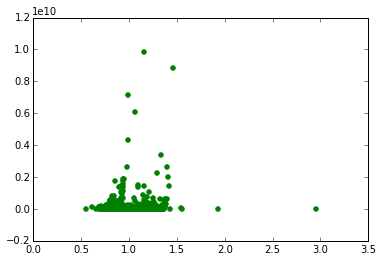

In [172]:
plt.scatter(startup_scores.as_matrix(), startup_funding.as_matrix(), color='g')

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


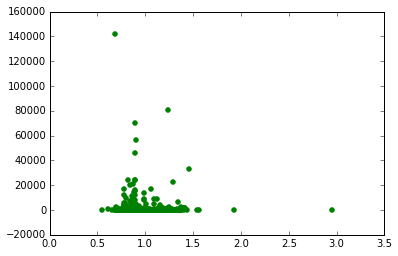

In [173]:
plt.scatter(startup_scores, startup_employees, color='g')

In [174]:
plotdata.describe()

,num_employees,crunchbase_rank,total_funding_amount,trend_score,total_equity_funding_amount,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
count,1655.000000,1655.000000,1.655000e+03,1643.000000,1.655000e+03,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000
mean,747.890030,5752.625378,1.291172e+08,0.011686,1.156223e+08,2.306755,115.622340,1.333281,0.402946,0.943695,0.023565,0.018731,0.059215,0.013897
std,5137.515958,6013.744185,5.708899e+08,2.482717,4.630881e+08,1.999632,463.088113,0.273071,0.012225,0.179520,0.151735,0.135615,0.236097,0.117100
min,2.000000,6.000000,2.000000e+06,-9.300000,2.000000e+06,0.110000,2.000000,0.750000,0.400000,0.545000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1572.000000,1.345000e+07,-1.100000,1.314750e+07,0.940000,13.147500,1.200000,0.400000,0.829500,0.000000,0.000000,0.000000,0.000000
50%,89.000000,3785.000000,3.768482e+07,-0.500000,3.700000e+07,1.760000,37.000000,1.200000,0.400000,0.887000,0.000000,0.000000,0.000000,0.000000
75%,250.000000,7707.500000,9.503304e+07,0.400000,9.100622e+07,2.920000,91.006000,1.440000,0.400000,1.005000,0.000000,0.000000,0.000000,0.000000
max,142267.000000,47542.000000,1.200247e+10,9.600000,9.853784e+09,20.680000,9853.784000,4.500000,0.525000,2.949000,1.000000,1.000000,1.000000,1.000000


In [175]:
regressor.coef_

array([[  4.34104827e-11]])

In [176]:
regressor.intercept_

array([ 0.93867564])

In [177]:
rankedstartups[rankedstartups.past_companies.str.contains('Clarium')].head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,NaN,0.38,160.0,1.92,0.4,1.372,1,1,0,0
1097,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y...",https://www.crunchbase.com/organization/artivest,"Financial Services, Lending and Investments","New York, New York, United States",Artivest connects a wider audience of suitable...,6256,http://www.artivest.co,...,NaN,2.68,17.0,1.20,0.4,0.833,0,0,0,0


In [178]:
top_companies = rankedstartups[:200]
top_companies_past = []
for company in top_companies['past_companies']:
    top_companies_past.extend([s.strip() for s in company.split(',')])
Counter(top_companies_past).most_common(20)

[('Google', 58),
 ('Microsoft', 48),
 ('Stanford University', 41),
 ('Oracle', 24),
 ('Apple', 22),
 ('University of California', 21),
 ('Cisco', 17),
 ('Yahoo! Inc.', 16),
 ('IBM', 16),
 ('Facebook', 15),
 ('Salesforce', 13),
 ('Berkeley', 10),
 ('LinkedIn', 10),
 ('Hewlett Packard Enterprise', 9),
 ('Twitter', 8),
 ('VMware', 8),
 ('Amazon', 8),
 ('Palantir Technologies', 7),
 ('NetApp', 5),
 ('Genentech', 5)]

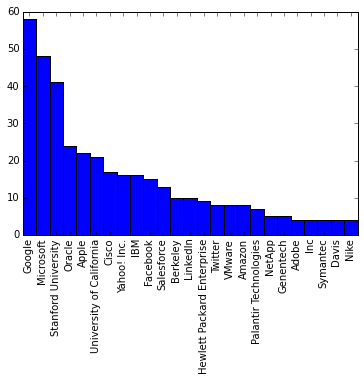

In [179]:
chart_most_common(top_companies_past)

In [180]:
top_companies_schools = []
for company in top_companies['past_schools']:
    top_companies_schools.extend([s.strip() for s in company.split(',')])
Counter(top_companies_schools).most_common(20)

[('Stanford University', 161),
 ('University of California Berkeley', 130),
 ('University of California Davis', 45),
 ('San Francisco State University', 36),
 ('San Jose State University', 33),
 ('Massachusetts Institute of Technology', 27),
 ('Carnegie Mellon University', 21),
 ('University of California Los Angeles', 21),
 ('University of California Santa Barbara', 15),
 ('Stanford University Graduate School of Business', 15),
 ('University of Southern California', 15),
 ('Santa Clara University', 14),
 ('Harvard University', 14),
 ('California Polytechnic State University-San Luis Obispo', 13),
 ('University of Waterloo', 12),
 ('Cornell University', 12),
 ('University of California San Diego', 11),
 ('University of Michigan', 9),
 ('University of California Santa Cruz', 9),
 ('University of Washington', 8)]

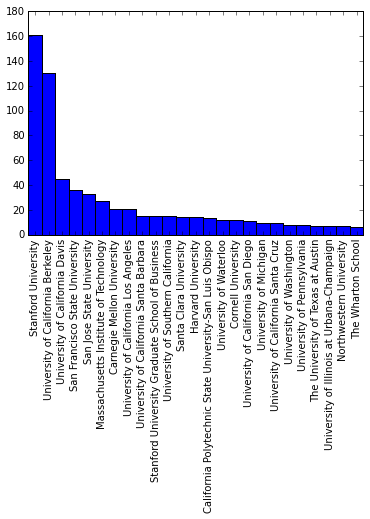

In [181]:
chart_most_common(top_companies_schools)

In [182]:
rankedstartups[240:242]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
1323,Cohere Technologies,51,"Qualcomm, Entropic Communications, Terayon, In...","University of California Berkeley, University ...",https://www.crunchbase.com/organization/cohere...,"Hardware, Mobile","Santa Clara, California, United States",Cohere Technologies is solving the key technic...,10211,http://cohere-technologies.com/,...,NaN,2.80,35.0,1.74,0.4,1.166,0,0,0,0
483,Chartboost,125,"Chartboost, Yahoo! Inc., YP, The Real Yellow P...","University of California Berkeley, University ...",https://www.crunchbase.com/organization/chartb...,"Gaming, Platforms, Apps, Software, Sales and M...","San Francisco, California, United States",Chartboost is the largest mobile-games only ma...,1971,http://www.chartboost.com,...,NaN,2.86,21.0,1.74,0.4,1.164,0,0,0,0


In [183]:
rankedstartups[rankedstartups.categories.str.contains('GovTech', na=False)].head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
1521,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...",https://www.crunchbase.com/organization/opengov,"Information Technology, Data and Analytics, So...","Redwood City, California, United States",OpenGov offers cloud-based software that visua...,18222,http://opengov.com,...,NaN,0.65,77.00,1.92,0.40,1.358,0,0,0,1
1600,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,NaN,0.65,30.50,1.92,0.40,1.357,0,0,0,1
747,Mark43,110,"Dataminr, Mark43, Deloitte, S&P Global Market ...","Harvard University, The George Washington Univ...",https://www.crunchbase.com/organization/mark43,"Information Technology, Data and Analytics, So...","New York, New York, United States",Mark43 develops law enforcement software that ...,3417,http://mark43.com,...,NaN,1.70,39.75,1.68,0.40,1.182,1,0,0,0
141,Nextdoor,271,"Twitter, Nextdoor, Google, Yelp, eBay Advertising","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/nextdoor,"Media and Entertainment, Information Technolog...","San Francisco, California, United States",Nextdoor is a private social network that enab...,490,http://nextdoor.com,...,NaN,2.85,210.20,1.74,0.40,1.179,0,0,1,0
470,Remix,114,"Microsoft, Code for America, LinkedIn, Omada H...","Massachusetts Institute of Technology, Brown U...",https://www.crunchbase.com/organization/remix,"Information Technology, Government and Militar...","San Francisco, California, United States",Remix is a planning platform for public transit.,1928,https://www.remix.com/,...,NaN,0.67,12.00,1.20,0.43,0.910,0,0,0,1


In [184]:
plotdata[plotdata.company_name.str.contains('Affinity', na=False)]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,valuation_at_ipo,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors
916,"Affinity, Inc.",42,"Stanford University, Palantir Technologies, In...","Stanford University, Claremont McKenna College...",https://www.crunchbase.com/organization/affini...,"Information Technology, Data and Analytics, So...","San Francisco, California, United States",Affinity develops a collective intelligence pl...,4730,https://affinity.co/,...,NaN,0.63,14.0,1.92,0.4,1.357,0,0,0,1


In [185]:
plotdata.shape

(1655, 28)

In [186]:
plotdata.to_csv('company_data.csv')

In [187]:
import json

with open('funding_data.json') as data_file:    
    vc_data = json.load(data_file)

In [188]:
funding_data = [(cb_url, vc_data[cb_url]) for cb_url in plotdata.company_name_url if cb_url in vc_data]

In [189]:
class Investment:
    funding_round = investor = ""
    partners = []
    is_lead_investor = False
    def __init__(self, investor, funding_round, partner, is_lead):
        self.funding_round = funding_round
        self.investor = investor
        self.partners = partner
        self.is_lead_investor = is_lead

In [190]:
def json_to_investors(funding):
    investors = []
    for funding_event in funding:
        is_lead_investment = funding_event['is_lead_investor'] == 'Yes'
        partners = funding_event['partners'] if funding_event['partners'] != ['—'] else []
        investment = Investment(funding_event['investor_name'], funding_event['funding_round'], partners, is_lead_investment)
        investors.append((investment.investor, investment.funding_round))
    return investors

In [191]:
[funding for funding in json_to_investors(funding_data[0][1])]

[('Founders Fund', 'Series E '),
 ('GIC', 'Series E '),
 ('Lightspeed Venture Partners', 'Series E '),
 ('Spark Capital', 'Series E '),
 ('Caffeinated Capital', 'Series E '),
 ('Ribbit Capital', 'Series E '),
 ('Khosla Ventures', 'Series E '),
 ('Morgan Stanley', 'Debt Financing '),
 ('Khosla Ventures', 'Series D '),
 ('Spark Capital', 'Series D '),
 ('Lightspeed Venture Partners', 'Series D '),
 ('Andreessen Horowitz', 'Series D '),
 ('Caffeinated Capital', 'Series D '),
 ('Jefferies', 'Series D '),
 ('Founders Fund', 'Series D '),
 ('Spark Capital', 'Series B '),
 ('Khosla Ventures', 'Series B '),
 ('Lightspeed Venture Partners', 'Series B '),
 ('Andreessen Horowitz', 'Series B '),
 ('Jefferies', 'Series B '),
 ('Khosla Ventures', 'Series A '),
 ('Lightspeed Venture Partners', 'Series A '),
 ('HVF Labs', 'Seed Round ')]

In [192]:
#[json_to_investors(data[x]) for x in plotdata.company_name_url if x in data]
plotdata['funding'] = plotdata['company_name_url'].apply(lambda x: json_to_investors(vc_data[x]) if x in vc_data else None)

In [193]:
missing_funding = plotdata[pd.isnull(plotdata.funding)]
missing_funding.shape

(5, 29)

In [194]:
plotdata = plotdata[pd.notnull(plotdata.funding)]
plotdata.shape

(1650, 29)

In [195]:
def search_investors(x, name):
    return any([name in y for y in x])
founders_fund = plotdata[plotdata.funding.apply(lambda x: search_investors(x, 'Founders Fund'))]
founders_fund = founders_fund[founders_fund.time_since_last_funding < 1.5]
founders_fund.sort_values('score', ascending=False).head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding
1416,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa...",https://www.crunchbase.com/organization/palant...,"Hardware, Information Technology, Consumer Ele...","Palo Alto, California, United States",Palantir Technologies offers a suite of softwa...,13212,http://www.palantir.com,...,0.97,2018.93,1.92,0.49,1.405,0,0,0,0,"[(Binux Capital, Private Equity Round ), (Shar..."
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,0.16,620.00,1.92,0.46,1.401,1,1,1,0,"[(Founders Fund, Series E ), (GIC, Series E ),..."
1603,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,1.12,440.00,1.92,0.46,1.378,1,1,0,0,"[(CapitalG, Series D ), (General Catalyst, Ser..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,0.38,160.00,1.92,0.40,1.372,1,1,0,0,"[(Lightspeed Venture Partners, Series D ), (Ja..."
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca...",https://www.crunchbase.com/organization/qadium...,"Information Technology, Software, Privacy and ...","San Francisco, California, United States",Qadium creates and organizes knowledge about t...,4492,https://qadium.com/,...,0.36,65.97,1.92,0.40,1.360,1,0,0,0,"[(IVP (Institutional Venture Partners), Series..."
138,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,0.36,77.55,1.92,0.40,1.360,0,0,0,1,"[(GV, Series A ), (Andreessen Horowitz, Series..."
286,Vicarious,51,"Microsoft, Google, Harvard University, Dartmou...","Stanford University, The Wharton School, India...",https://www.crunchbase.com/organization/vicari...,"Science and Engineering, Hardware, Data and An...","San Francisco, California, United States",Vicarious is an artificial intelligence compan...,1064,http://vicarious.com,...,0.46,122.00,1.92,0.43,1.354,0,0,0,0,"[(SamsungNEXT Ventures, Series C ), (Khosla Ve..."
292,Branch,198,"Branch, Google, Microsoft, Nokia, Hewlett Pack...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/branch...,"Apps, Data and Analytics, Software, Sales and ...","Palo Alto, California, United States",Branch helps companies drive seamless mobile e...,1090,https://branch.io,...,0.75,113.05,1.92,0.40,1.348,0,0,0,0,"[(Cowboy Ventures, Series C ), (Playground Ven..."
1213,Boom Fantasy,14,"IAF - Israeli Air Force, Carestream, High 5 Ga...",Stanford University Graduate School of Busines...,https://www.crunchbase.com/organization/boom-s...,"Gaming, Sports, Mobile","New York, New York, United States",Boom Shakalaka is an in-game fantasy sports co...,7876,http

In [196]:
thiel = plotdata[plotdata.funding.apply(lambda x: search_investors(x, 'Peter Thiel'))]
thiel = thiel[thiel.num_employees > 10]
#thiel = thiel[thiel.categories.str.contains('Financ', na=False)]
#thiel = thiel[thiel.last_funding_type.str.contains('Series A')]
thiel.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding
1603,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,1.12,440.0,1.92,0.46,1.378,1,1,0,0,"[(CapitalG, Series D ), (General Catalyst, Ser..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,0.38,160.0,1.92,0.40,1.372,1,1,0,0,"[(Lightspeed Venture Partners, Series D ), (Ja..."
231,Quora,344,"Quora, Google, Facebook, Stanford University, ...","Stanford University, Harvard University, Unive...",https://www.crunchbase.com/organization/quora,"Media and Entertainment, Information Technolog...","Mountain View, California, United States",Quora is a Q&A platform with a mission to shar...,839,http://quora.com,...,0.72,226.0,1.92,0.40,1.362,1,0,0,0,"[(Collaborative Fund, Series D ), (Matrix Part..."
657,SafeGraph,21,"LiveRamp, An Acxiom Company, Apteligent (acq. ...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/safegraph,"Science and Engineering, Data and Analytics, C...","San Francisco, California, United States",SafeGraph is unlocking the world's most powerf...,2908,http://www.safegraph.com/,...,0.72,16.0,1.92,0.40,1.356,0,0,0,1,"[(Naval Ravikant, Series A ), (Corazon Capital..."
286,Vicarious,51,"Microsoft, Google, Harvard University, Dartmou...","Stanford University, The Wharton School, India...",https://www.crunchbase.com/organization/vicari...,"Science and Engineering, Hardware, Data and An...","San Francisco, California, United States",Vicarious is an artificial intelligence compan...,1064,http://vicarious.com,...,0.46,122.0,1.92,0.43,1.354,0,0,0,0,"[(SamsungNEXT Ventures, Series C ), (Khosla Ve..."


In [197]:
levchin = plotdata[plotdata.funding.apply(lambda x: search_investors(x, 'Max Levchin'))]
levchin.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding
86,Pinterest,1639,"Google, Pinterest, Facebook, Microsoft, Yahoo!...","Stanford University, University of California ...",https://www.crunchbase.com/organization/pinterest,"Travel and Tourism, Media and Entertainment, I...","San Francisco, California, United States",Pinterest is a visual bookmarking tool for sav...,266,https://pinterest.com,...,0.59,1466.100,1.92,0.46,1.412,1,1,0,0,"[(blisce/, Secondary Market ), (Founders Circl..."
1599,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...",https://www.crunchbase.com/organization/opendo...,"Real Estate, Internet Services","San Francisco, California, United States",Opendoor is an online home-selling service aim...,27014,https://www.opendoor.com,...,1.10,319.950,1.92,0.40,1.368,1,1,0,0,"[(Felicis Ventures, Series D ), (Norwest Ventu..."
46,Color Genomics,123,"Twitter, Google, University of California, Dav...","Stanford University, University of California ...",https://www.crunchbase.com/organization/color-...,"Biotechnology, Science and Engineering, Data a...","Burlingame, California, United States",Color Genomics provides a service that helps p...,112,https://www.color.com,...,0.40,150.548,1.92,0.40,1.362,1,0,0,0,"[(CRV, Series C ), (Emerson Collective, Series..."
418,Honor,218,"Google, Meebo, Apple, Home Instead Senior Care...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/honor-2,"Information Technology, Health Care, Mobile","San Francisco, California, United States",Honor provides personalized home care for peop...,1676,http://joinhonor.com,...,1.43,62.000,1.92,0.46,1.340,0,0,0,0,"[(Syno Capital, Series B ), (8VC, Series B ), ..."
125,AngelList,137,"Microsoft, eBay, Voxbone, Google, Dropbox","Stanford University, University of California ...",https://www.crunchbase.com/organization/angellist,"Professional Services, Financial Services","San Francisco, California, United States","AngelList is a U.S. website for startups, ange...",434,http://angel.co,...,2.84,26.200,1.92,0.43,1.291,1,0,0,0,"[(Haiyin Capital, Series B ), (Social Leverage..."


In [198]:
eightvc = plotdata[plotdata.funding.apply(lambda x: search_investors(x, '8VC'))]
eightvc.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding
1521,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...",https://www.crunchbase.com/organization/opengov,"Information Technology, Data and Analytics, So...","Redwood City, California, United States",OpenGov offers cloud-based software that visua...,18222,http://opengov.com,...,0.65,77.00,1.92,0.40,1.358,0,0,0,1,"[(Andreessen Horowitz, Series C ), (Thrive Cap..."
916,"Affinity, Inc.",42,"Stanford University, Palantir Technologies, In...","Stanford University, Claremont McKenna College...",https://www.crunchbase.com/organization/affini...,"Information Technology, Data and Analytics, So...","San Francisco, California, United States",Affinity develops a collective intelligence pl...,4730,https://affinity.co/,...,0.63,14.00,1.92,0.40,1.357,0,0,0,1,"[(Pear Ventures, Series A ), (Great Oaks Ventu..."
1600,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,0.65,30.50,1.92,0.40,1.357,0,0,0,1,"[(Abstract Ventures, Series A ), (Sound Ventur..."
135,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,0.59,205.84,1.92,0.40,1.352,0,0,0,0,"[(CreditEase Fintech Investment Fund, Series D..."
848,Ascend.io,14,"Microsoft, IBM, Ooyala, Oracle, Extole","Stanford University, University of California ...",https://www.crunchbase.com/organization/ascend-io,"Data and Analytics, Software","Palo Alto, California, United States",Ascend is a platform for the rapid creation of...,4165,http://www.ascend.io,...,0.65,19.00,1.92,0.43,1.351,0,0,0,0,"[(Accel Partners, Series A ), (Sequoia Capital..."


In [199]:
a16z = plotdata[plotdata.funding.apply(lambda x: search_investors(x, 'Andreessen Horowitz'))]
a16z = a16z[a16z.num_employees > 10]
a16z.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding
86,Pinterest,1639,"Google, Pinterest, Facebook, Microsoft, Yahoo!...","Stanford University, University of California ...",https://www.crunchbase.com/organization/pinterest,"Travel and Tourism, Media and Entertainment, I...","San Francisco, California, United States",Pinterest is a visual bookmarking tool for sav...,266,https://pinterest.com,...,0.59,1466.1,1.92,0.46,1.412,1,1,0,0,"[(blisce/, Secondary Market ), (Founders Circl..."
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,0.16,620.0,1.92,0.46,1.401,1,1,1,0,"[(Founders Fund, Series E ), (GIC, Series E ),..."
1603,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,1.12,440.0,1.92,0.46,1.378,1,1,0,0,"[(CapitalG, Series D ), (General Catalyst, Ser..."
1261,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...",https://www.crunchbase.com/organization/analyst,"Financial Services, Mobile","Palo Alto, California, United States",Robinhood is a stock brokerage that allows cus...,8704,https://www.robinhood.com/,...,0.70,176.0,1.92,0.45,1.377,0,1,1,0,"[(DST Global, Series C ), (Index Ventures, Ser..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,0.38,160.0,1.92,0.40,1.372,1,1,0,0,"[(Lightspeed Venture Partners, Series D ), (Ja..."


In [200]:
top_investors = []
for company in plotdata.funding:
    top_investors.extend([s[0] for s in company])
Counter(top_investors).most_common(20)

[('Sequoia Capital', 583),
 ('Accel Partners', 533),
 ('Kleiner Perkins Caufield & Byers', 473),
 ('Andreessen Horowitz', 358),
 ('Khosla Ventures', 329),
 ('SV Angel', 319),
 ('Lightspeed Venture Partners', 293),
 ('General Catalyst', 254),
 ('Greylock Partners', 251),
 ('Benchmark', 236),
 ('New Enterprise Associates', 199),
 ('Y Combinator', 195),
 ('GV', 186),
 ('Founders Fund', 180),
 ('Index Ventures', 171),
 ('First Round Capital', 168),
 ('DAG Ventures', 121),
 ('Slow Ventures', 111),
 ('Redpoint', 109),
 ('Bessemer Venture Partners', 106)]

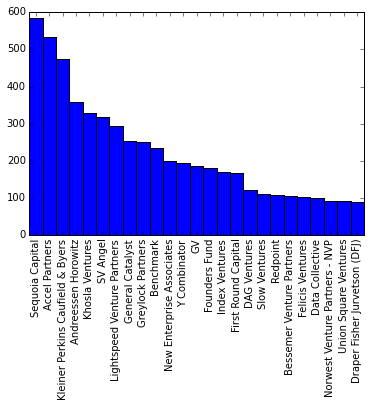

In [201]:
chart_most_common(top_investors)

In [202]:
top_investors = pd.read_csv('top_investors.csv')

In [203]:
top_investors['Number of Investments'] = top_investors['Number of Investments'].replace('[\$,]', '', regex=True).astype(int)
top_investors['norm_investments'] = top_investors['Number of Investments'] / top_investors['Number of Investments'].max()
top_investors['norm_exits'] = top_investors['Number of Exits'] / top_investors['Number of Exits'].max()
top_investors['exit_ratio'] = top_investors['Number of Exits'] / top_investors['Number of Investments']

In [204]:
top_investors['score'] = top_investors['norm_investments'] * 0.35 + top_investors['norm_exits'] * 0.45 + top_investors['exit_ratio'] * 0.2
top_investors.sort_values('score', ascending=False).head()

,Organization/Person Name,Organization/Person Name URL,Number of Investments,Number of Exits,Location,Description,CB Rank (Investor),Trend Score (90 Days),Investor Type,Investment Stage,norm_investments,norm_exits,exit_ratio,score
4,Intel Capital,https://www.crunchbase.com/organization/intel-...,1208,336.0,"Santa Clara, California, United States",Intel Capital is an investment firm that is fo...,981,2.7,Venture Capital,Seed,0.749380,1.000000,0.278146,0.767912
1,Sequoia Capital,https://www.crunchbase.com/organization/sequoi...,1529,265.0,"Menlo Park, California, United States","Sequoia is a VC firm focused on energy, financ...",178,-0.7,Venture Capital,"Early Stage Venture, Late Stage Venture, Seed",0.948511,0.788690,0.173316,0.721553
3,New Enterprise Associates,https://www.crunchbase.com/organization/new-en...,1387,275.0,"Menlo Park, California, United States",New Enterprise Associates is a California-base...,59,-0.6,Venture Capital,"Debt, Early Stage Venture, Late Stage Venture,...",0.860422,0.818452,0.198270,0.709105
5,Accel Partners,https://www.crunchbase.com/organization/accel-...,1129,230.0,"Palo Alto, California, United States",Accel is a leading early and growth-stage vent...,53,-1.3,Venture Capital,"Early Stage Venture, Late Stage Venture, Seed",0.700372,0.684524,0.203720,0.593910
2,Y Combinator,https://www.crunchbase.com/organization/y-comb...,1516,175.0,"Mountain View, California, United States",Y Combinator is a startup accelerator based in...,9,-0.3,Accelerator,"Debt, Early Stage Venture, Seed",0.940447,0.520833,0.115435,0.586618


In [205]:
investor_scorer = {'Founders Fund': 0.95, 'Peter Thiel': 0.9, '8VC': 0.85, 'Max Levchin': 0.85, 'SciFi VC': 0.8, 
                    'Andreessen Horowitz': 0.85, 'Sequoia Capital': 0.8, 'Greylock Partners': 0.8, 'Khosla Ventures': 0.75,
                    'Lightspeed Venture Partners': 0.7, 'Accel Partners': 0.6, 'General Catalyst': 0.7,
                    'Formation 8': 0.7, 'Naval Ravikant': 0.65, 'Joe Lonsdale': 0.8, 'Elad Gil': 0.65, 'Marc Andreessen': 0.8, 'GV': 0.55,
                    'Charlie Cheever': 0.6, 'Alexis Ohanian': 0.6, 'Garry Tan': 0.6, 'Sam Altman': 0.6, 'Adam Nash': 0.55, 'Sean Parker': 0.7}
for k, v in investor_scorer.items():
    top_investors['score'].loc[top_investors['Organization/Person Name'] == k] = v
top_investors.sort_values('score', ascending=False).head(10)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Organization/Person Name,Organization/Person Name URL,Number of Investments,Number of Exits,Location,Description,CB Rank (Investor),Trend Score (90 Days),Investor Type,Investment Stage,norm_investments,norm_exits,exit_ratio,score
63,Founders Fund,https://www.crunchbase.com/organization/founde...,347,54.0,"San Francisco, California, United States",Founders Fund is a San Francisco based venture...,99,0.8,Venture Capital,"Debt, Early Stage Venture, Grant, Late Stage V...",0.215261,0.160714,0.155620,0.950000
1589,Peter Thiel,https://www.crunchbase.com/person/peter-thiel,32,6.0,"San Francisco, California, United States",Peter Thiel is a technology entrepreneur and i...,117,7.0,"Individual/Angel, Investment Partner",Seed,0.019851,0.017857,0.187500,0.900000
948,8VC,https://www.crunchbase.com/organization/8vc,51,2.0,"San Francisco, California, United States",8VC aims to transform the technology infrastru...,790,8.4,Venture Capital,NaN,0.031638,0.005952,0.039216,0.850000
673,Max Levchin,https://www.crunchbase.com/person/max-levchin,69,19.0,"San Francisco, California, United States",Max Levchin is an investor and advisor to emer...,"1,752",6.8,Individual/Angel,Seed,0.042804,0.056548,0.275362,0.850000
26,Andreessen Horowitz,https://www.crunchbase.com/organization/andree...,566,89.0,"Menlo Park, California, United States",Andreessen Horowitz is a Silicon Valley-based ...,48,2.3,Venture Capital,"Debt, Early Stage Venture, Late Stage Venture,...",0.351117,0.264881,0.157244,0.850000
1,Sequoia Capital,https://www.crunchbase.com/organization/sequoi...,1529,265.0,"Menlo Park, California, United States","Sequoia is a VC firm focused on energy, financ...",178,-0.7,Venture Capital,"Early Stage Venture, Late Stage Venture, Seed",0.948511,0.788690,0.173316,0.800000
17,Greylock Partners,https://www.crunchbase.com/organization/greylock,630,170.0,"Menlo Park, California, United States",Greylock Partners backs entrepreneurs who are ...,113,-0.2,Venture Capital,"Early Stage Venture, Late Stage Venture, Seed",0.390819,0.505952,0.269841,0.800000
1374,Marc Andreessen,https://www.crunchbase.com/person/marc-andreessen,37,23.0,"San Francisco, California, United States",Marc Andreessen is a cofounder and general par...,"2,324",-0.9,"Individual/Angel, Investment Partner",Seed,0.022953,0.068452,0.621622,0.800000
1691,Joe Lonsdale,https://www.crunchbase.com/person/joe-lonsdale,30,9.0,"San Francisco, California, United States","Joe Lonsdale is a founding partner at 8VC, a S...","3,210",-1.8,"Individual/Angel, Investment Partner",Seed,0.018610,0.026786,0.300000,0.800000
4,Intel Capital,https://www.crunchbase.com/organization/intel-...,1208,336.0,"Santa Clara, California, United States",Intel Capital is an investment firm that is fo...,981,2.7,Venture Capital,Seed,0.749380,1.000000,0.278146,0.767912


In [206]:
def score_round(funding_round):
    if 'Series A' in funding_round:
        return 1.1
    elif 'Series B' in funding_round:
        return 1.15
    elif 'Series C' in funding_round:
        return 1.2
    elif 'Series D' in funding_round:
        return 1.25
    elif 'Series E' in funding_round:
        return 1.25
    elif 'Seed' in funding_round:
        return 0.7
    elif 'Private Equity Round' in funding_round:
        return 1.25
    else:
        return 0.8
def get_investment_score(funding_event):
    investor_name, funding_round = funding_event[0], funding_event[1]
    match = top_investors[top_investors['Organization/Person Name'] == investor_name]
    if len(match) == 0 or pd.isnull(match.iloc[0].score): return 0.2
    return match.iloc[0].score * score_round(funding_round)
def sorted_investors(startup_funding):
    return sorted(startup_funding, reverse=True, key=lambda x: get_investment_score(x)) #factoring funding round

In [207]:
plotdata.funding = plotdata.funding.apply(lambda x: sorted_investors(x))
plotdata.head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,0.16,620.0,1.92,0.46,1.401,1,1,1,0,"[(Founders Fund, Series E ), (Founders Fund, S..."
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/flexport,Transportation,"San Francisco, California, United States",Flexport is a platform for global trade. The c...,26670,https://www.flexport.com/,...,0.30,204.0,1.74,0.40,1.261,1,1,0,0,"[(Founders Fund, Series B ), (Founders Fund, S..."


In [208]:
#select top 4 notable investors
def score_investor(investor_name):
    match = top_investors[top_investors['Organization/Person Name'] == investor_name]
    if len(match) == 0 or pd.isnull(match.iloc[0].score): return 0.2
    return match.iloc[0].score
def get_top_investors(startup_funding):
    unique_investors = list(set([k for k, v in startup_funding])) 
    return sorted(unique_investors, reverse=True, key=lambda x: score_investor(x))[:4] 
plotdata['top_investors'] = plotdata.funding.apply(lambda x: get_top_investors(x))
plotdata.head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding,top_investors
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,620.0,1.92,0.46,1.401,1,1,1,0,"[(Founders Fund, Series E ), (Founders Fund, S...","[Founders Fund, Andreessen Horowitz, Khosla Ve..."
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/flexport,Transportation,"San Francisco, California, United States",Flexport is a platform for global trade. The c...,26670,https://www.flexport.com/,...,204.0,1.74,0.40,1.261,1,1,0,0,"[(Founders Fund, Series B ), (Founders Fund, S...","[Founders Fund, Joe Lonsdale, Alexis Ohanian, ..."


In [209]:
def score_top_investors(funding):
    investment_score = 0
    for investor in funding:
        score = get_investment_score(investor)
        if pd.isnull(score): score = 0.2
        investment_score += score
    return investment_score / 7

In [210]:
plotdata['investor_score'] = plotdata.funding.apply(lambda x: score_top_investors(x[:7]))

In [211]:
plotdata.sort_values('investor_score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding,top_investors,investor_score
1614,Oscar,508,"Oscar Health, Google, Apple, Bridgewater Assoc...","Harvard University, New York University, Arizo...",https://www.crunchbase.com/organization/oscar,"Information Technology, Health Care, Financial...","New York, New York, United States",Oscar is a health insurance company that emplo...,15388,http://hioscar.com,...,1.68,0.40,1.192,1,0,0,0,"[(Founders Fund, Private Equity Round ), (Foun...","[Founders Fund, Khosla Ventures, General Catal...",1.046071
1603,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,1.92,0.46,1.378,1,1,0,0,"[(Founders Fund, Series C ), (Founders Fund, S...","[Founders Fund, Peter Thiel, Andreessen Horowi...",1.027857
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,1.92,0.46,1.401,1,1,1,0,"[(Founders Fund, Series E ), (Founders Fund, S...","[Founders Fund, Andreessen Horowitz, Khosla Ve...",1.023571
1492,Okta,1230,"Okta Inc., Oracle, Salesforce, Microsoft, Sun ...","University of California Berkeley, San Jose St...",https://www.crunchbase.com/organization/okta,"Information Technology, Software, Privacy and ...","San Francisco, California, United States",Okta is the foundation for secure connections ...,15932,http://www.okta.com,...,1.74,0.40,1.188,0,0,0,0,"[(Andreessen Horowitz, Series E ), (Andreessen...","[Andreessen Horowitz, Greylock Partners, Sequo...",1.020714
286,Vicarious,51,"Microsoft, Google, Harvard University, Dartmou...","Stanford University, The Wharton School, India...",https://www.crunchbase.com/organization/vicari...,"Science and Engineering, Hardware, Data and An...","San Francisco, California, United States",Vicarious is an artificial intelligence compan...,1064,http://vicarious.com,...,1.92,0.43,1.354,0,0,0,0,"[(Founders Fund, Series B ), (Founders Fund, S...","[Founders Fund, Peter Thiel, Joe Lonsdale, Kho...",1.017143


In [212]:
def rescore_startup(startup):
    time_since_funding_score = timeFactor(startup.time_since_last_funding)
    funding_ratio = startup.funding_ratio / plotdata.funding_ratio.max()
    school_score = startup.school_score / plotdata.school_score.max()
    return funding_ratio * 0.25 + school_score * 0.7 + startup.investor_score * 0.75 + startup.company_score * 0.25 - max(0, startup.time_since_last_funding - 1) * 0.1 + 0.025 * (startup.breakoutlist + startup.linkedin + startup.wealthfront) + 0.05 * startup.editors
plotdata.score = round(plotdata.apply(lambda x: rescore_startup(x), axis=1), 3)

In [213]:
us_startups = plotdata[plotdata.headquarters_location.str.contains('United States', na=False)]
us_startups.sort_values('score', ascending=False).head(30)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding,top_investors,investor_score
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,1.92,0.46,1.272,1,1,1,0,"[(Founders Fund, Series E ), (Founders Fund, S...","[Founders Fund, Andreessen Horowitz, Khosla Ve...",1.023571
67,Airbnb,6213,"Airbnb, Google, Facebook, Microsoft, Apple","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/airbnb,"Travel and Tourism, Commerce and Shopping","San Francisco, California, United States",Airbnb is an online community marketplace for ...,188,http://airbnb.com,...,1.74,0.40,1.263,1,1,0,0,"[(Founders Fund, Series C ), (Andreessen Horow...","[Founders Fund, Andreessen Horowitz, Greylock ...",1.008571
1603,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...",https://www.crunchbase.com/organization/stripe,"Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",Stripe provides a set of unified APIs and tool...,482,http://stripe.com,...,1.92,0.46,1.234,1,1,0,0,"[(Founders Fund, Series C ), (Founders Fund, S...","[Founders Fund, Peter Thiel, Andreessen Horowi...",1.027857
86,Pinterest,1639,"Google, Pinterest, Facebook, Microsoft, Yahoo!...","Stanford University, University of California ...",https://www.crunchbase.com/organization/pinterest,"Travel and Tourism, Media and Entertainment, I...","San Francisco, California, United States",Pinterest is a visual bookmarking tool for sav...,266,https://pinterest.com,...,1.92,0.46,1.188,1,1,0,0,"[(Andreessen Horowitz, Series E ), (Andreessen...","[Max Levchin, Andreessen Horowitz, SV Angel, G...",0.916786
286,Vicarious,51,"Microsoft, Google, Harvard University, Dartmou...","Stanford University, The Wharton School, India...",https://www.crunchbase.com/organization/vicari...,"Science and Engineering, Hardware, Data and An...","San Francisco, California, United States",Vicarious is an artificial intelligence compan...,1064,http://vicarious.com,...,1.92,0.43,1.172,0,0,0,0,"[(Founders Fund, Series B ), (Founders Fund, S...","[Founders Fund, Peter Thiel, Joe Lonsdale, Kho...",1.017143
1615,Rubrik,598,"Dell EMC, NetApp, Dell, VMware, Cisco","Stanford University, University of California ...",https://www.crunchbase.com/organization/rubrik,"Hardware, Information Technology, Software, In...","Palo Alto, California, United States",Rubrik offers live data access for recovery an...,10765,http://rubrik.com/,...,1.92,0.40,1.156,1,1,1,0,"[(Greylock Partners, Series D ), (Greylock Par...","[Greylock Partners, Khosla Ventures, Lightspee...",0.900000
1521,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...",https://www.crunchbase.com/organization/opengov,"Information Technology, Data and Analytics, So...","Redwood City, California, United States",OpenGov offers cloud-based software that visua...,18222,http://opengov.com,...,1.92,0.40,1.137,0,0,0,1,"[(Andreessen Horowitz, Series C ), (8VC, Serie...","[8VC, Andreessen Horowitz, Formation 8, Founde...",0.915714
20,Databricks,223,"Microsoft, Google, Databricks, IBM, Axway","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/databr...,"Data and Analytics, Software","San Francisco, California, United States",Databricks accelerates innovation by unifying ...,35,https://databricks.com,...,1.74,0.43,1.136,0,1,1,0,"[(Andreessen Horowitz, Series D ), (Andreessen...","[Andreessen Horowitz, New En

In [214]:
plotdata.corr()

,num_employees,crunchbase_rank,total_funding_amount,trend_score,total_equity_funding_amount,time_since_last_funding,funding_ratio,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,investor_score
num_employees,1.000000,-0.069379,0.184936,-0.048080,0.177627,0.197228,0.177627,-0.019365,0.040485,-0.148554,0.004920,0.011607,-0.014133,-0.015356,-0.010966
crunchbase_rank,-0.069379,1.000000,-0.106404,-0.108925,-0.111603,0.314594,-0.111603,-0.027323,-0.024828,-0.391470,0.004568,-0.026466,-0.134344,0.051470,-0.278020
total_funding_amount,0.184936,-0.106404,1.000000,-0.014295,0.964089,-0.070075,0.964089,0.026405,0.084582,0.178959,0.093193,0.188910,0.021072,-0.016714,0.149611
trend_score,-0.048080,-0.108925,-0.014295,1.000000,-0.025589,0.032394,-0.025589,-0.022550,-0.048822,-0.098127,-0.098047,-0.059041,-0.088825,-0.017820,-0.090118
total_equity_funding_amount,0.177627,-0.111603,0.964089,-0.025589,1.000000,-0.070653,1.000000,0.025218,0.063403,0.189788,0.109964,0.215747,0.032090,-0.017142,0.166154
time_since_last_funding,0.197228,0.314594,-0.070075,0.032394,-0.070653,1.000000,-0.070653,-0.052575,-0.056115,-0.787432,-0.081076,-0.087768,-0.056676,-0.067598,-0.108055
funding_ratio,0.177627,-0.111603,0.964089,-0.025589,1.000000,-0.070653,1.000000,0.025218,0.063403,0.189788,0.109964,0.215747,0.032090,-0.017142,0.166154
school_score,-0.019365,-0.027323,0.026405,-0.022550,0.025218,-0.052575,0.025218,1.000000,0.134946,0.261193,0.179250,0.119374,0.014859,0.102185,0.108484
company_score,0.040485,-0.024828,0.084582,-0.048822,0.063403,-0.056115,0.063403,0.134946,1.000000,0.085747,0.040666,0.083297,-0.018769,0.068438,0.015653
score,-0.148554,-0.391470,0.178959,-0.098127,0.189788,-0.787432,0.189788,0.261193,0.085747,1.000000,0.273024,0.223990,0.183956,0.112261,0.671584


In [215]:
plotdata[plotdata.editors == 1].sort_values('score', ascending=False)#.head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding,top_investors,investor_score
1521,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...",https://www.crunchbase.com/organization/opengov,"Information Technology, Data and Analytics, So...","Redwood City, California, United States",OpenGov offers cloud-based software that visua...,18222,http://opengov.com,...,1.92,0.40,1.137,0,0,0,1,"[(Andreessen Horowitz, Series C ), (8VC, Serie...","[8VC, Andreessen Horowitz, Formation 8, Founde...",0.915714
138,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,1.92,0.40,1.076,0,0,0,1,"[(Founders Fund, Series A ), (Founders Fund, S...","[Founders Fund, Andreessen Horowitz, GV, CRV]",0.833571
6,Cadre,88,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University...",https://www.crunchbase.com/organization/cadre-2,"Commerce and Shopping, Real Estate, Financial ...","New York, New York, United States",Cadre is an online marketplace that connects i...,1235,http://cadre.com,...,1.56,0.44,1.042,0,0,0,1,"[(Founders Fund, Series A ), (Andreessen Horow...","[Founders Fund, Andreessen Horowitz, Khosla Ve...",0.847935
1654,Atrium LTS,16,"Rockman Et Al, Yahoo! Inc., Massachusetts Inst...","University of California Berkeley, Columbia Un...",https://www.crunchbase.com/organization/atrium...,"Software, Professional Services","San Francisco, California, United States",Atrium is building legal tools,37975,https://www.atriumlts.com,...,1.74,0.40,1.012,0,0,0,1,"[(Founders Fund, Series A ), (Greylock Partner...","[Founders Fund, Greylock Partners, New Enterpr...",0.787647
7,Zocdoc,588,"Zocdoc, Apple, Microsoft, Yodle, Arizona State...","Arizona State University, Cornell University, ...",https://www.crunchbase.com/organization/zocdoc,"Commerce and Shopping, Health Care","New York, New York, United States",Zocdoc is the beginning of a better healthcare...,960,http://www.zocdoc.com,...,1.20,0.40,0.914,0,0,0,1,"[(Founders Fund, Series D ), (Founders Fund, S...","[Founders Fund, Khosla Ventures, SV Angel, Gol...",0.947206
152,Rigetti Computing,80,"University of California, Berkeley, Dell, NASA...","University of California Berkeley, Massachuset...",https://www.crunchbase.com/organization/rigett...,"Science and Engineering, Hardware, Data and An...","Berkeley, California, United States",Rigetti Computing is a full-stack quantum comp...,562,http://www.rigetti.com/,...,1.74,0.40,0.810,0,0,0,1,"[(Andreessen Horowitz, Series B ), (Andreessen...","[Andreessen Horowitz, Y Combinator, Felicis Ve...",0.517117
4,Lemonade,50,"Liberty Mutual Insurance, AIG, Fiverr, Powerma...","Tel Aviv University, IDC Herzliya, Technion - ...",https://www.crunchbase.com/organization/lemonade,"Science and Engineering, Data and Analytics, S...","New York, New York, United States",Lemonade offers homeowners and renters insuran...,23116,http://www.lemonade.com,...,1.20,0.40,0.788,0,0,0,1,"[(Sequoia Capital, Series B ), (Sequoia Capita...","[Sequoia Capital, General Catalyst, GV, Tusk V...",0.599643
536,Quantopian,75,"Quantopian, IBM, SS&C Advent, Tamale Software,...","Dartmouth College, Boston University, Massachu...",https://www.crunchbase.com/organization/quanto...,"Financial Services, Lending and Investments","Boston, Massachusetts, United States",Quantopian inspires talented people to write i...,2247,http://www.quantopian.com,...,1.20,0.40,0.760,0,0,0,1,"[(Andreessen Horowitz, Series C ), (Khosla Ven...","[Andreessen Horowi

In [216]:
filtered = plotdata[plotdata.categories.str.contains('|'.join(['Finance', 'Financial Services', 'Real Estate', 'Insurance']), na=False)]
filtered = filtered[filtered.headquarters_location.str.contains('|'.join(['San Francisco', 'New York']), na=False)]
filtered.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding,top_investors,investor_score
0,Affirm,302,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,1.92,0.46,1.272,1,1,1,0,"[(Founders Fund, Series E ), (Founders Fund, S...","[Founders Fund, Andreessen Horowitz, Khosla Ve...",1.023571
1614,Oscar,508,"Oscar Health, Google, Apple, Bridgewater Assoc...","Harvard University, New York University, Arizo...",https://www.crunchbase.com/organization/oscar,"Information Technology, Health Care, Financial...","New York, New York, United States",Oscar is a health insurance company that emplo...,15388,http://hioscar.com,...,1.68,0.40,1.101,1,0,0,0,"[(Founders Fund, Private Equity Round ), (Foun...","[Founders Fund, Khosla Ventures, General Catal...",1.046071
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,1.92,0.40,1.098,1,1,0,0,"[(Founders Fund, Series C ), (Greylock Partner...","[Founders Fund, Peter Thiel, Andreessen Horowi...",0.860714
1599,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...",https://www.crunchbase.com/organization/opendo...,"Real Estate, Internet Services","San Francisco, California, United States",Opendoor is an online home-selling service aim...,27014,https://www.opendoor.com,...,1.92,0.40,1.096,1,1,0,0,"[(Khosla Ventures, Series D ), (Max Levchin, S...","[Max Levchin, Khosla Ventures, New Enterprise ...",0.865912
6,Cadre,88,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University...",https://www.crunchbase.com/organization/cadre-2,"Commerce and Shopping, Real Estate, Financial ...","New York, New York, United States",Cadre is an online marketplace that connects i...,1235,http://cadre.com,...,1.56,0.44,1.042,0,0,0,1,"[(Founders Fund, Series A ), (Andreessen Horow...","[Founders Fund, Andreessen Horowitz, Khosla Ve...",0.847935


In [217]:
top_unlisted = plotdata[plotdata.breakoutlist + plotdata.wealthfront + plotdata.linkedin + plotdata.editors == 0]
top_unlisted.sort_values('score', ascending=False).head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding,top_investors,investor_score
286,Vicarious,51,"Microsoft, Google, Harvard University, Dartmou...","Stanford University, The Wharton School, India...",https://www.crunchbase.com/organization/vicari...,"Science and Engineering, Hardware, Data and An...","San Francisco, California, United States",Vicarious is an artificial intelligence compan...,1064,http://vicarious.com,...,1.92,0.43,1.172,0,0,0,0,"[(Founders Fund, Series B ), (Founders Fund, S...","[Founders Fund, Peter Thiel, Joe Lonsdale, Kho...",1.017143
224,Lytro,122,"Lytro , Industrial Light & Magic, Microsoft, D...","Stanford University, University of California ...",https://www.crunchbase.com/organization/lytro,"Hardware, Media and Entertainment, Software, V...","Mountain View, California, United States","Lytro, a Light Field imaging startup, markets ...",815,http://www.lytro.com,...,1.92,0.40,1.129,0,0,0,0,"[(Andreessen Horowitz, Series D ), (Andreessen...","[Andreessen Horowitz, Greylock Partners, New E...",0.965912
1620,Docker,468,"Red Hat, VMware, Microsoft, Cisco, Sun Microsy...","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/docker,"Software, Internet Services","San Francisco, California, United States",Docker is a platform for distributed applicati...,367,https://www.docker.com,...,1.74,0.40,1.108,0,0,0,0,"[(Greylock Partners, Series D ), (Sequoia Capi...","[Greylock Partners, Sequoia Capital, Lightspee...",0.977143
11,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/uber,"Apps, Software, Transportation, Mobile","San Francisco, California, United States",Uber is a mobile app connecting passengers wit...,12,http://www.uber.com,...,1.74,0.40,1.068,0,0,0,0,"[(New Enterprise Associates, Series E ), (GV, ...","[New Enterprise Associates, Naval Ravikant, GV...",0.631536
144,Nubank,12,"Google, Conpec, Revmob, Freeway Viagens, REGLARE","Universidade Anhembi Morumbi, Universidade Est...",https://www.crunchbase.com/organization/nubank,"Payments, Financial Services, Lending and Inve...","São Paulo, Sao Paulo, Brazil",Nubank provides financial services in Brazil.,509,https://www.nubank.com.br/,...,1.20,0.46,1.018,0,0,0,0,"[(Founders Fund, Series D ), (Founders Fund, S...","[Founders Fund, Sequoia Capital, Goldman Sachs...",0.949643


In [218]:
plotdata.shape

(1650, 31)

In [219]:
plotdata[plotdata.company_name.str.contains('Sourcegraph', na=False)]

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding,top_investors,investor_score
8,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi...",https://crunchbase.com/organization/sourcegraph,Software,"San Francisco, California, United States",Sourcegraph is creating the best way to read a...,4432,https://sourcegraph.com,...,1.92,0.46,0.52,0,0,0,1,"[(Redpoint, Series A ), (Goldcrest Capital, Se...","[Redpoint, Goldcrest Capital]",0.074963


In [220]:
#plotdata.to_csv('company_data.csv')

In [228]:
finance = plotdata[plotdata.categories.str.contains("FinTech", na=False)]
finance = finance[finance.last_funding_type.str.contains('Seed')]
finance.sort_values('score', ascending=False).head(30)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,school_score,company_score,score,breakoutlist,linkedin,wealthfront,editors,funding,top_investors,investor_score
982,OpenInvest,14,"Bridgewater Associates, World Wildlife Fund, L...","The Johns Hopkins University, Cornell Universi...",https://www.crunchbase.com/organization/openin...,"Sustainability, Financial Services","San Francisco, California, United States",OpenInvest is using technology to mainstream s...,5285,https://www.openinvest.co/,...,1.2,0.5,0.504,0,0,0,0,"[(Andreessen Horowitz, Seed Round ), (Abstract...","[Andreessen Horowitz, SV2, Abstract Ventures, ...",0.256429
999,Propel,43,"Propel London, Symbian, Drew London, Kings Arm...","University of Hertfordshire, University of Por...",https://www.crunchbase.com/organization/propel-4,"Apps, Software, Government and Military, Inter...","Brooklyn, New York, United States",Propel makes the social safety net more user-f...,5453,http://joinpropel.com/,...,1.2,0.4,0.479,0,0,0,0,"[(Andreessen Horowitz, Seed Round ), (SciFi VC...","[Andreessen Horowitz, Durant Company, SciFi VC...",0.256429
1214,Returnly,23,"Optimizely, Centura Software, Glassdoor, Middl...","Saint Michael's College, Bond University, UNSW...",https://www.crunchbase.com/organization/return,"Commerce and Shopping, Payments, Financial Ser...","Larkspur, California, United States",Returnly is a Fintech platform that turns prod...,7900,https://www.returnly.com,...,1.2,0.4,0.421,0,0,0,0,"[(SV Angel, Seed Round ), (Index Ventures, See...","[SV Angel, Index Ventures, InReach Ventures, I...",0.211520
1326,Verifly,6,"Quidsi Inc., a subsidiary of Amazon, JCDecaux,...","General Assembly, Universidad Católica Nordest...",https://www.crunchbase.com/organization/verifly,"Hardware, Consumer Electronics, Consumer Goods...","New York, New York, United States",Verifly delivers on-demand drone insurance for...,10252,http://verifly.com,...,1.2,0.4,0.395,0,0,0,0,"[(Sam Shank, Seed Round ), (Irelandia Aviation...","[Sam Shank, Steve Hafner, Blake Krikorian, Ali...",0.200000
1289,Captain401,22,"Intuit, Zenefits, CampWest, iKeepSafe, Insight...","Lane Community College, University of Californ...",https://www.crunchbase.com/organization/captai...,Financial Services,"San Francisco, California, United States",Captain401 helps small businesses set up and m...,9455,https://captain401.com/,...,1.2,0.4,0.377,0,0,0,0,"[(Y Combinator, Seed Round ), (SV Angel, Seed ...","[Y Combinator, SV Angel, Uncork Capital, Trife...",0.236772
1394,BRIGHT,7453,"Bright Horizons, KinderCare, KinderCare Educat...","Ashford University, San Francisco State Univer...",https://www.crunchbase.com/organization/bright-3,"Natural Resources, Energy, Sustainability, Fin...","San Francisco, California, United States",Enabling the developing world with cleaner and...,12578,http://www.thinkbright.mx,...,1.2,0.4,0.360,0,0,0,0,"[(Max Levchin, Seed Round ), (Y Combinator, Se...","[Max Levchin, Y Combinator, First Round Capita...",0.287786
